- **R√©alis√© par :**

**Zakaria Taoubi**


<p style="font-style: italic; color: #2C3E50;"> Vous pouvez trouver plus d'informations sur mon travail sur mon GitHub :</p>

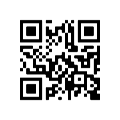

In [2]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('Taoubi__Zakaria.png')
fig, ax = plt.subplots(figsize=(2, 2)) # Ajustez la taille de la figure
ax.imshow(img)
ax.axis('off') 
plt.subplots_adjust(left=0.5- 0.25, right=2, top=0.5 + 0.25, bottom=0.5- 0.25)
plt.show()

##  Introduction

 <div style="background-color:#e6f7ff; padding: 20px; border-radius: 8px;">

Dans le cadre de mon master en physique m√©dicale √† l'ISSS de Settat, **dans le module Monte Carlo appliqu√©e √† la physique m√©dicale**, sous la direction du **Pr. Mustapha Krim**, j'ai r√©alis√© un mini projet sur la mod√©lisation des trajectoires de photons.

Le code Python pr√©sent√© utilise des simulations de Monte Carlo pour **mod√©liser les trajectoires de photons interagissant avec l'eau en fonction de leur √©nergie**. Les m√©thodes de Monte Carlo sont des outils puissants en physique pour la mod√©lisation stochastique, et dans ce contexte, elles sont appliqu√©es pour simuler les interactions complexes entre les photons et l'eau.

La simulation prend en compte divers processus d'interaction tels que :

- La diffusion Compton
- L'effet photo√©lectrique
- La production de paires

Ces processus contribuent collectivement √† l'att√©nuation des photons dans le milieu de propagation, offrant ainsi un mod√®le repr√©sentatif des interactions photon-eau dans un contexte d'√©nergie donn√©.
</div>


##  Outils Utilis√©s
Dans le cadre de ce projet, les outils suivants ont √©t√© utilis√©s :

**Python** : J'ai utilis√© ce langage pour la simulation et le traitement des donn√©es.

**Jupyter Notebook** : J'ai utilis√© cet environnement pour la r√©daction du rapport et l'ex√©cution du projet.

 <div style="background-color:#e6f7ff; padding: 20px; border-radius: 8px;">

## Plan du projet
    
Voici l'outline que j'ai suivi, bas√© sur le cours de mon **professeur Mustapha Krim.**

**√ânergies des photons simul√©es**

**1 - Interactions des photons**

  - 1.1 Effet photo√©lectrique
  - 1.2 Diffusion Compton
  - 1.3 Production de paires
  
**2 - Att√©nuation des photons**

  - 2.1 Coefficient d'att√©nuation et section efficace d'interaction
  
**3 - Probabilit√© d'int√©raction**

**4 - √âchantillonnage des longueurs de pas des photons**

  - 4.1 Distributions de probabilit√© de profondeur
  - 4.2 M√©thode de transformation inverse de Monte Carlo
  
**5 - Calcul de l'√©nergie des photons diffus√©s**

**6 - √âchantillonnage des angles de diffusion Compton**

  - 6.1 Section efficace diff√©rentielle normalis√©e
  - 6.2 √âchantillonnage par rejet de Monte Carlo
  
**7 - Simulation du chemin des photons**

 - 7.1 Transformation du rep√®re de r√©f√©rence
 - 7.2 Simulation des trajectoires des photons dans un milieu
 
**8 - Conclusion et visualisations**

 - 8.1 Trajectoires des photons √† haute et basse √©nergie
 - 8.2 Repr√©sentation visuelle : Contraste √©nerg√©tique
 - 8.3 √âvolution des photons de 2 MeV : Att√©nuation et diffusion
</div>


> **Note** : J'ai aussi r√©alis√© un autre projet pour calculer une int√©grale en quatre dimensions en C++. Vous pourrez le voir √† la fin de ce projet.  J'ai choisi de l'√©crire dans Visual Studio, car Jupyter Notebook ne supporte pas directement l'ex√©cution de code en C++ sans ajouter de noyau sp√©cifique comme `xeus-cling`. Vous pouvez le voir dans mon Gihtub

### Avant de commencer √† coder, j'ai import√© toutes les biblioth√®ques n√©cessaires pour la simulation. Voici la liste des biblioth√®ques :

In [2]:
!pip install bottleneck

In [3]:
pip install numpy==1.23.5 pandas==2.1.3 pip scipy==1.9.3

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np          # Numpy est utilis√© pour les op√©rations math√©matiques et les tableaux
import matplotlib.pyplot as plt # Matplotlib est utilis√© pour la visualisation des donn√©es
import random              # Biblioth√®que pour g√©n√©rer des nombres al√©atoires
import scipy.stats as scp # Scipy est utilis√© pour les distributions statistiques et d'autres fonctions avanc√©es
import pandas as pd          # Pandas est utilis√© pour la manipulation et l'analyse des donn√©es
from sklearn.preprocessing import PolynomialFeatures # Pour g√©n√©rer des caract√©ristiques polynomiales
from sklearn.linear_model import LinearRegression # Pour effectuer la r√©gression lin√©aire
import math               # Biblioth√®que math√©matique pour des fonctions suppl√©mentaires comme pi
from math import pi        # Importation sp√©cifique de la constante pi pour un usage direct
%matplotlib inline         
import warnings           # Importation de la biblioth√®que pour g√©rer les avertissements
warnings.simplefilter("ignore") # D√©sactivation des avertissements dans le notebook

 <div style="background-color:#e6f7ff; padding: 20px; border-radius: 8px;">

## √ânergies des photons simul√©es

Dans cette simulation, je vais me concentrer sur deux **√©nergies de photons**, √† savoir **50 keV** et **2 MeV**. Ces √©nergies ont √©t√© choisies car elles couvrent les trois interactions des photons que nous avons abord√©es, tout en mettant en √©vidence les variations des trajectoires des photons en fonction de leur √©nergie.

Je peux ajuster ces √©nergies dans l'intervalle suivant : **0 - 20 MeV**. Cependant, il est important d'ajuster les **param√®tres de simulation** en fonction de l'√©nergie des photons afin de garantir des r√©sultats pr√©cis et √©viter toute complication.
</div>


In [5]:
    ## Les √©nergies des photons sont saisies en MeV
photon_energy_1 = 0.05  #  J'ai D√©fini l'√©nergie du premier photon (en MeV)
photon_energy_2 = 2     #  J'ai D√©fini l'√©nergie du deuxi√®me photon (en MeV)


##  Interactions des photons



### Constantes fondamentales et fonctions :
J'ai commenc√© le code par d√©finir des constantes fondamentales li√©es aux processus de **diffusion Compton**, d'**effet photo√©lectrique**, et de **production de paires**. Ces constantes incluent la masse au repos de l'√©lectron, le nombre d'√©lectrons par unit√© de volume dans l'eau, le rayon classique de l'√©lectron, la constante de structure fine, ainsi que le num√©ro atomique de l'eau. Ces constantes sont des param√®tres cruciaux pour le calcul des sections efficaces et des probabilit√©s d'interaction.


In [6]:
## Constantes ##
moc2 = 0.510998955 # Masse au repos de l'√©lectron en MeV
n_v = 3.43*1e+22 # Nombre d'√©lectrons par unit√© de volume dans l'eau (cm‚Åª¬≥)
re = 2.81794 * 1e-13  # Rayon classique de l'√©lectron en cm
alpha = 1 / 137  #  Constante de structure fine
Z = 10  # Num√©ro atomique approximatif de l'eau (H‚ÇÇO)

## Effet Photo√©lectrique


**L'effet photo√©lectrique** est un ph√©nom√®ne th√©oris√© par Albert Einstein, o√π le photon incident est absorb√© par l'atome, ce qui entra√Æne une excitation ou une ionisation en fonction de l'√©nergie du photon incident. Toutefois, dans le cadre de la simulation des trajectoires des photons, nous nous int√©ressons principalement au fait que le photon est retir√© du trajet du faisceau s'il interagit par l'effet photo√©lectrique.
La section efficace pour l'effet photo√©lectrique peut √™tre calcul√©e √† l'aide de la formule suivante :

In [7]:
#from sympy import symbols, sqrt, pi
#r_e, alpha, Z, k = symbols('r_e alpha Z k')
#sigma_ph = (16/2) * sqrt(2) * pi * r_e**2 * alpha**4 * (Z**5 / k**3.5)
#sigma_ph

O√π :
- $r_{e}$ est le rayon classique de l'√©lectron,
- $\alpha$ est la constante de structure fine,
- $Z$ est le num√©ro atomique du mat√©riau,
- $k$ est le rapport entre l'√©nergie du photon et l'√©nergie au repos de l'√©lectron.

L'√©quation ci-dessus montre la relation complexe entre la section efficace et divers facteurs. Cependant, il est important de noter que la section efficace est principalement influenc√©e par deux facteurs cl√©s : le num√©ro atomique $Z$ √©lev√© √† la puissance 5 et l'√©nergie du photon inversement cub√©e $1/(hv)^3$. La d√©pendance en $Z^5$ met en √©vidence le fait que les interactions sont plus probables avec des noyaux cibles plus lourds, qui poss√®dent un plus grand nombre d'√©lectrons disponibles pour l'excitation. De plus, **la section efficace diminue √† mesure que l'√©nergie du photon augmente**, ce qui indique que l'effet photo√©lectrique devient plus pertinent pour **les photons de faible √©nergie**

In [8]:
def sigma_ph(en):
    a = en/moc2
    return (16 / 2) * np.sqrt(2) * np.pi * (re ** 2) * (alpha ** 4) * ((Z ** 5) / (a ** 3.5))

## Diffusion Compton



**La diffusion Compton** est un processus fondamental dans lequel les photons interagissent avec des particules charg√©es, g√©n√©ralement des √©lectrons, ce qui entra√Æne un changement de direction du photon et un transfert d'√©nergie √† l'√©lectron. Ce ph√©nom√®ne, d√©couvert par Arthur H. Compton, est un √©l√©ment cl√© pour comprendre le comportement des rayons X et des rayons gamma lorsqu'ils traversent la mati√®re. La section efficace de diffusion Compton $œÉ$ quantifie la probabilit√© que cet √©v√©nement de diffusion se produise et est d√©finie par l'√©quation de Klein-Nishina :

In [9]:
#from sympy import symbols, pi, log
#Z, r_e, k = symbols('Z r_e k')
#sigma_c = 2 * pi * Z * r_e**2 * (
#    (1 + k) / k**2 * (2 * (1 + k) / (1 + 2 * k) - log(1 + 2 * k) / k) +
#    log(1 + 2 * k) / (2 * k) -
#    (1 + 3 * k) / (1 + 2 * k)**2
#)
#sigma_c

Cette √©quation d√©crit la probabilit√© qu'un photon subisse une diffusion Compton au sein d'un milieu, la section efficace d√©pendant de l'√©nergie du photon incident. De cela, nous pouvons en d√©duire que l'interaction photonique dominante, √† mesure que l'√©nergie du photon incident augmente, passe de l'effet photo√©lectrique √† la diffusion Compton. De plus, la probabilit√© d'interaction d√©pend de la densit√© √©lectronique de la cible, o√π les √©lectrons plus faiblement li√©s sont pr√©sents.

In [10]:
## Fonction pour calculer la section efficace de la diffusion Compton ##
def sigma(en):
  a = en/moc2 # Calcul du param√®tre 'a' bas√© sur l'√©nergie de la particule (en) et la masse au repos de l'√©lectron (moc2)
  t1 = ((1+a)/a**2)*(((2*(1+a)/(1+2*a)) - np.log(1 + 2*a)/a))
  t2 = np.log(1+2*a)/ (2*a)
  t3 = (1+3*a)/((1+2*a)**2)
  t= (t1+t2-t3)
# Retourner la section efficace totale, multipli√©e par le facteur de Z et le carr√© du rayon classique de l'√©lectron (re)
  return 2*Z*np.pi*((re**2)) * t 

## Production de paires


La production de paires repr√©sente un ph√©nom√®ne important dans lequel un photon de haute √©nergie est absorb√© dans le champ √©lectromagn√©tique nucl√©aire d'un atome, ce qui entra√Æne la cr√©ation d'une paire √©lectron-positron. Ce processus complexe n√©cessite que l'√©nergie du photon incident d√©passe deux fois l'√©nergie de repos de l'√©lectron, soit environ **1,022 MeV**, pour que l'interaction puisse avoir lieu.

La d√©termination de la section efficace totale pour la production de paires est complexe et souvent approxim√©e par des mod√®les th√©oriques. Elle englobe divers facteurs tels que les propri√©t√©s du mat√©riau cible, l'√©nergie des photons incidents et les principes de l'√©lectrodynamique quantique. La section efficace atomique de la production de paires peut √™tre approxim√©e par :


In [11]:
#from sympy import symbols, pi, log, Eq
#a, r_0, Z, P_bar, k = symbols('a r_0 Z P_bar k')
#equation = Eq(k, a * r_0**2 * Z**2 * P_bar)
#equation


En observant l'√©quation  , **on peut en d√©duire que la section efficace atomique pour la production de paires est proportionnelle au carr√© du num√©ro atomique $Z$ et √† l'√©nergie du photon incident**. Cette relation implique que la production de paires devient de plus en plus significative pour les photons de haute √©nergie et dans les mat√©riaux ayant des num√©ros atomiques plus √©lev√©s.

Pour le but de cette simulation, nous allons approximer la section efficace de la production de paires √† partir de valeurs tabul√©es et utiliser une r√©gression polynomiale pour estimer la section efficace dans une plage d'√©nergies.


In [12]:
data = {
    'Energy (energyMev)': [0.0001, 0.00015, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0008, 0.001, 0.0015, 0.002, 0.003, 0.004, 0.005, 0.006, 0.008, 0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.66163, 0.8, 1, 1.1732, 1.2522, 1.3325, 1.5, 2, 3, 4, 5, 6, 8, 10, 15, 20],
    'Hydrogen cs': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.70E-29, 8.03E-29, 1.67E-28, 4.43E-28, 1.78E-27, 5.11E-27, 8.30E-27, 1.11E-26, 1.37E-26, 1.79E-26, 2.14E-26, 2.79E-26, 3.28E-26],
    'Oxygen cs': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.80E-27, 5.29E-27, 1.09E-26, 2.87E-26, 1.14E-25, 3.33E-25, 5.31E-25, 7.12E-25, 8.71E-25, 1.14E-24, 1.36E-24, 1.78E-24, 2.08E-24]
}
df = pd.DataFrame(data)
print(df.tail())

### Calcul de la moyenne pond√©r√©e et cr√©ation d'un nouveau DataFrame
weighted_average = (df['Hydrogen cs'] * 2 + df['Oxygen cs']) / 3
df_w = pd.DataFrame({'energyMev': df['Energy (energyMev)'], 'cs': weighted_average})
#print(df_w)

    Energy (energyMev)   Hydrogen cs     Oxygen cs
42                 6.0  1.370000e-26  8.710000e-25
43                 8.0  1.790000e-26  1.140000e-24
44                10.0  2.140000e-26  1.360000e-24
45                15.0  2.790000e-26  1.780000e-24
46                20.0  3.280000e-26  2.080000e-24


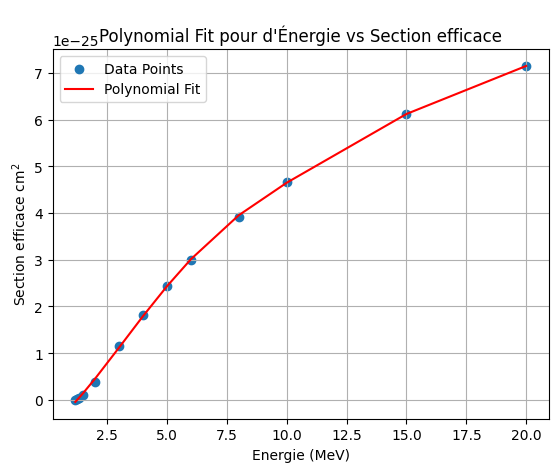

In [13]:
## R√©gression Polynomiale ##
filtered_df = df_w[(df_w['energyMev'] > 1) & (df_w['cs'] != 0)] ## Supprimer les 0 ##
# Extraction des variables pour la r√©gression
X = filtered_df['energyMev'].values.reshape(-1, 1)  # Variable ind√©pendante (features)
y = filtered_df['cs'].values  # variable d√©pendante (target)
# G√©n√©ration des caract√©ristiques polynomiales
poly = PolynomialFeatures(degree=5)  # Vous pouvez modifier le degr√© du polyn√¥me
X_poly = poly.fit_transform(X)
# Cr√©ation d'un mod√®le de r√©gression polynomiale
model = LinearRegression()
# Ajustement du mod√®le
model.fit(X_poly, y)
# Pr√©diction sur le mod√®le ajust√©
y_pred = model.predict(X_poly)
# Obtenir les coefficients du polyn√¥me ajust√©
coefficients = model.coef_
intercept = model.intercept_

# D√©finir une fonction pour calculer la section efficace pr√©dite en fonction de l'√©nergie
def sigma_pair_production(energy):
# Transformer l'√©nergie d'entr√©e en caract√©ristiques polynomiales
    energy_poly = poly.transform(np.array([[energy]]))
# Calculer la section efficace pr√©dite en utilisant les coefficients et les caract√©ristiques polynomiales
    predicted_cs = np.dot(energy_poly, coefficients.T) + intercept
# Assurer la non-n√©gativit√©
    if predicted_cs < 0:
        return 0
    if energy < 1.022: # Impl√©menter la condition d'√©nergie
        predicted_cs = 0
    return float(predicted_cs)


# Tracer les points de donn√©es et la courbe polynomiale
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', label='Polynomial Fit')
plt.xlabel('Energie (MeV)')
plt.ylabel('Section efficace cm$^{2}$')
plt.title("Polynomial Fit pour d'√ânergie vs Section efficace")
plt.legend()
plt.grid(True)
plt.show()

## Att√©nuation des photons


L'att√©nuation des photons, qui indique la r√©duction de l'intensit√© d'un faisceau de photons lorsqu'il traverse de la mati√®re, joue un r√¥le fondamental dans la simulation des trajectoires des photons. L'att√©nuation est quantifi√©e par le coefficient d'att√©nuation lin√©aire $\mu$, qui repr√©sente la probabilit√© d'interaction par unit√© de longueur.

Comme mentionn√© pr√©c√©demment, la probabilit√© d'une interaction unique est quantifi√©e par la section efficace d'interaction. Ainsi, le coefficient d'att√©nuation est la combinaison de tous les processus d'interactions partielles et se caract√©rise par l'√©quation suivante :

In [14]:
#from sympy import symbols, Eq
#sigma_p, sigma_c, sigma_P, n_v, mu = symbols('sigma_p sigma_c sigma_P n_v mu')
#equation = Eq(mu, (sigma_p + sigma_c + sigma_P) * n_v)
#equation

O√π $n_v$ est le nombre d'√©lectrons par unit√© de volume dans l'eau, et $\sigma_i$ repr√©sente la section efficace pour les interactions de photons mentionn√©es pr√©c√©demment. L'interaction principale d√©pend ainsi du ratio des sections efficaces et est affect√©e par l'√©nergie des photons dans notre cas.

In [15]:
# D√©finir l'intervalle d'√©nergie
energies = np.arange(0, 20,0.001) # Nous simulons des photons jusqu'√† 20 MeV

"""Calculer les sections efficaces pour chaque √©nergie pour l'effet photo√©lectrique, la diffusion Compton 
et la production de paires"""

cross_sections_ph = np.array([sigma_ph(energy) for energy in energies])
cross_sections_cs = np.array([sigma(energy) for energy in energies])
cross_sections_pp = np.array([sigma_pair_production(energy) for energy in energies])

# Convertir les sections efficaces en coefficients d'att√©nuation
attenuation_ph = np.array(cross_sections_ph) * n_v
attenuation_cs = np.array(cross_sections_cs) * n_v
attenuation_pp = cross_sections_pp * n_v

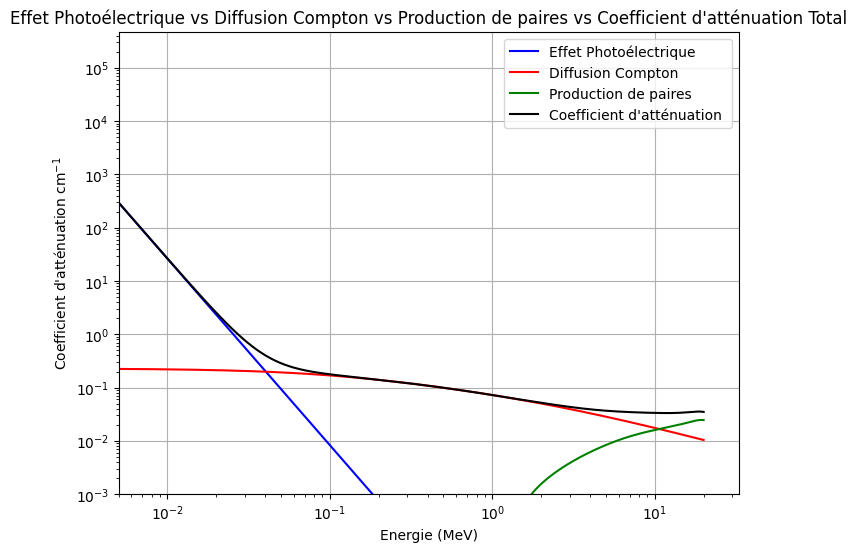

In [16]:
# Calculer le coefficient d'att√©nuation total
total_attenuation = attenuation_ph + attenuation_cs + attenuation_pp

"""Tracer l'effet photo√©lectrique, la diffusion Compton, la production de paires et les coefficients d'att√©nuation totaux 
en fonction de l'√©nergie (√©chelle log-log) """

plt.figure(figsize=(8, 6))
plt.plot(energies, attenuation_ph, label='Effet Photo√©lectrique', color='blue')
plt.plot(energies, attenuation_cs, label='Diffusion Compton', color='red')
plt.plot(energies, attenuation_pp, label='Production de paires', color='green')
plt.plot(energies, total_attenuation, label="Coefficient d'att√©nuation ", color='black') # Ajout du coefficients d'att√©nuation 
plt.xlabel('Energie (MeV)')
plt.ylabel("Coefficient d'att√©nuation cm$^{-1}$")
plt.title("Effet Photo√©lectrique vs Diffusion Compton vs Production de paires vs Coefficient d'att√©nuation Total")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.ylim(0.001)
plt.xlim(0.005)
plt.show()

##  Coefficient d'att√©nuation et Section efficace d'int√©raction


La fonction suivante joue un r√¥le crucial dans la simulation du passage d'un faisceau de photons √† travers un milieu. En prenant l'√©nergie des photons en entr√©e, la fonction calcule les sections efficaces pour l'effet photo√©lectrique, la diffusion Compton et la production de paires, repr√©sentant les probabilit√©s de ces interactions. Par la suite, ces sections efficaces sont converties en att√©nuations respectives par unit√© de longueur en les multipliant par le nombre d'√©lectrons par unit√© de volume $n_v$.

La fonction calcule ensuite le coefficient d'att√©nuation total en additionnant les att√©nuations individuelles. Ce coefficient d'att√©nuation total quantifie la r√©duction globale de l'intensit√© du faisceau de photons, en tenant compte des effets collectifs de tous les processus d'interaction. Par cons√©quent, la fonction fournit des informations pr√©cieuses sur l'att√©nuation ainsi que sur la probabilit√© d'interaction par unit√© de longueur pour chacune des trois interactions des photons, ce qui aide dans l'analyse compl√®te des trajectoires des photons √† travers le milieu.


In [17]:
def total_attenuation_coefficient(energy):
## Calcul des sections efficaces pour l'effet photo√©lectrique, la diffusion Compton, la production de paires, etc.
    cross_section_ph = sigma_ph(energy)
    cross_section_cs = sigma(energy)
    cross_section_pair_production = sigma_pair_production(energy)
    
## Conversion des sections efficaces en att√©nuations respectives
    attenuation_ph = cross_section_ph * n_v
    attenuation_cs = cross_section_cs * n_v
    attenuation_pair_production = cross_section_pair_production * n_v
    
## Calcul du coefficient d'att√©nuation total en sommant toutes les att√©nuations
    total_attenuation = attenuation_ph + attenuation_cs + attenuation_pair_production
    
    return (total_attenuation, attenuation_ph, attenuation_cs, attenuation_pair_production)


In [18]:
## Att√©nuation pour l'√©nergie du photon 1
b_1 = total_attenuation_coefficient(photon_energy_1)
print((f"For photon energy {photon_energy_1} MeV, the Total Attenuation Coefficient is {b_1[0]:.3f} , the PE Attenuation is {b_1[1]:.3f} the Compton Attenuation is {b_1[2]:.3f} and the Pair Production Attenuation is {b_1[3]:.3f} "))
m_1 = b_1[0]
cs_1 = b_1[2]
           
## Att√©nuation pour l'√©nergie du photon 2
b_2 = total_attenuation_coefficient(photon_energy_2)
print((f"For photon energy {photon_energy_2} MeV, the Total Attenuation Coefficient is {b_2[0]:.3f} , the PE Attenuation is {b_2[1]:.3f} the Compton Attenuation is {b_2[2]:.3f} and the Pair Production Attenuation is {b_2[3]:.3f} "))
m_2 = b_2[0]
cs_2 = b_2[2]


For photon energy 0.05 MeV, the Total Attenuation Coefficient is 0.286 , the PE Attenuation is 0.094 the Compton Attenuation is 0.193 and the Pair Production Attenuation is 0.000 
For photon energy 2 MeV, the Total Attenuation Coefficient is 0.052 , the PE Attenuation is 0.000 the Compton Attenuation is 0.050 and the Pair Production Attenuation is 0.002 


On peut tirer les conclusions suivantes que √Ä faible √©nergie (0.05 MeV), l'att√©nuation est domin√©e par la diffusion Compton et l'effet photo√©lectrique, tandis qu'√† plus haute √©nergie (2 MeV), l'effet photo√©lectrique dispara√Æt au profit d'une att√©nuation principalement due √† la diffusion Compton, avec une contribution mineure de la production de paires. Cette √©volution est conforme aux attentes th√©oriques selon lesquelles les processus d'interaction des photons avec la mati√®re d√©pendent fortement de l'√©nergie du photon.

## Probabilit√© d'Int√©raction

Dans cette section sur la probabilit√© d'interaction, j'ai examin√© comment la probabilit√© de chaque interaction photonique varie en fonction de l'√©nergie. Les probabilit√©s d'interaction sont calcul√©es en normalisant les sections efficaces de l'effet photo√©lectrique, de la diffusion Compton et de la production de paires par rapport √† la section efficace totale. Cette normalisation permet de d√©terminer la probabilit√© de chaque processus d'interaction pour des photons avec des √©nergies sp√©cifiques. En analysant les rapports de ces sections efficaces, nous obtenons des informations sur le m√©canisme d'interaction dominant √† diff√©rents niveaux d'√©nergie. Les graphiques √† barres associ√©s illustrent comment ces probabilit√©s changent √† deux valeurs d'√©nergie photonique distinctes (50 keV et 2 MeV), fournissant une repr√©sentation visuelle de l'importance relative de chaque type d'interaction dans diff√©rents r√©gimes d'√©nergie.

> **Remarque** : cette fonction n'estime PAS la probabilit√© d'interaction, mais la probabilit√© de quel type d'interaction aura lieu si le photon interagit avec le milieu √† une √©nergie sp√©cifique.

Dans cette section, j'ai examin√© comment la probabilit√© de chaque interaction des photons varie en fonction de l'√©nergie. Les probabilit√©s d'interaction sont calcul√©es en normalisant les sections efficaces pour l'effet photo√©lectrique, la diffusion Compton et la production de paires par rapport √† la section efficace totale. Cette normalisation permet de d√©terminer la probabilit√© que chaque processus d'interaction se produise pour des photons √† des √©nergies sp√©cifiques.

#### Normalisation des Sections Efficaces

Pour calculer ces probabilit√©s d'interaction, nous utilisons la formule suivante :

$$
P_{\text{interaction}} = \frac{\sigma_{\text{interaction}}}{\sigma_{\text{totale}}}
$$

O√π :

$$
P_{\text{interaction}} : \text{est la probabilit√© d'un type d'interaction sp√©cifique}
$$

$$
\sigma_{\text{interaction}} : \text{est la section efficace de l'interaction consid√©r√©e}
$$

$$
\sigma_{\text{totale}} : \text{est la section efficace totale de toutes les interactions}
$$


### Visualisation des Probabilit√©s

Les probabilit√©s normalis√©es sont ensuite visualis√©es √† l'aide de graphiques en barres, qui montrent l'√©volution de la probabilit√© de chaque interaction en fonction de l'√©nergie des photons. Deux √©nergies sp√©cifiques, **50 keV** et **2 MeV**, sont choisies pour illustrer la variation des probabilit√©s d'interaction √† diff√©rentes √©nergies.

- √Ä **50 keV**, l'effet photo√©lectrique est souvent dominant, avec une probabilit√© plus √©lev√©e pour les photons de faible √©nergie d'interagir de cette mani√®re.
- √Ä **2 MeV**, la diffusion Compton devient l'interaction dominante, et la probabilit√© de la production de paires augmente pour les √©nergies plus √©lev√©es.

### Remarque Importante

Il est essentiel de souligner que cette fonction **ne permet pas d'estimer la probabilit√© d'interaction** globale d'un photon, mais plut√¥t la **probabilit√© de quel type d'interaction se produira** si le photon interagit avec le milieu √† une √©nergie donn√©e.


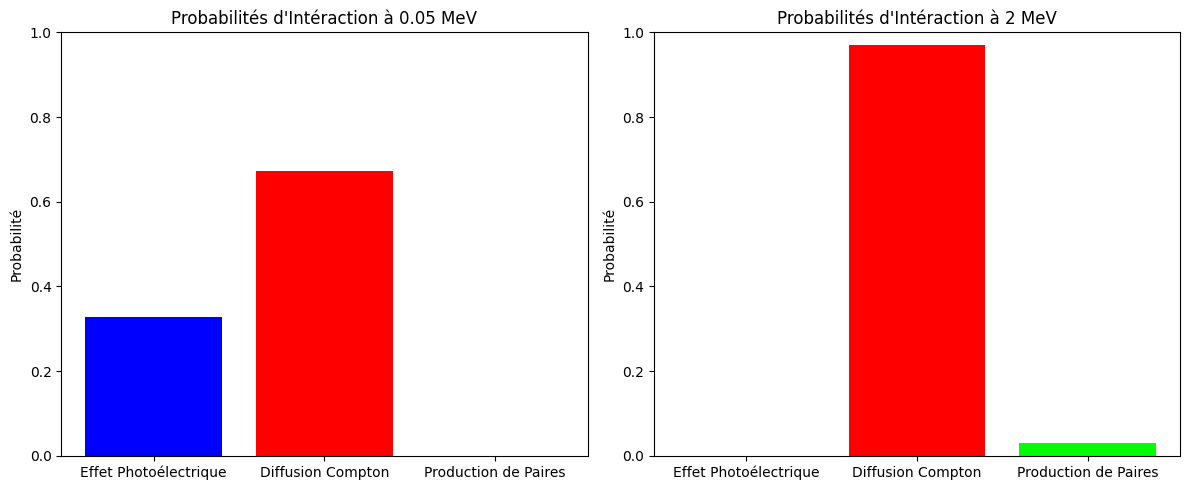

In [19]:
# Fonction pour calculer les probabilit√©s d'interaction pour une √©nergie de photon donn√©e
def calculate_interaction_probabilities(photon_energy):
    cross_section_ph = sigma_ph(photon_energy) *n_v
    cross_section_cs = sigma(photon_energy)*n_v
    cross_section_pp = sigma_pair_production(photon_energy)*n_v
    total_cross_section = cross_section_ph + cross_section_cs + cross_section_pp
    # Normaliser les probabilit√©s
    probability_ph = cross_section_ph / total_cross_section
    probability_cs = cross_section_cs / total_cross_section
    probability_pp = cross_section_pp / total_cross_section
    normalized_probabilities = [probability_ph , probability_cs, probability_pp ]
    return normalized_probabilities


# D√©finir les √©nergies des photons
photon_energies = [photon_energy_1, photon_energy_2]
# Cr√©er des dictionnaires pour stocker les DataFrames pour chaque √©nergie
data_frames = {}
for energy in photon_energies:
    normalized_probabilities = calculate_interaction_probabilities(energy)
# Cr√©er un DataFrame pour chaque √©nergie sans normalisation
    data = {
       'Probabilit√© d\'Interaction': normalized_probabilities,
       'Interaction': ['Effet Photo√©lectrique', 'Diffusion Compton', 'Production de Paires']
    }
    df = pd.DataFrame(data)
    if energy == photon_energy_1:
        df1 = df  # Sauvegarder le DataFrame pour l'√©nergie du photon 1 
    elif energy == photon_energy_2:
        df2 = df  # Sauvegarder le DataFrame pour l'√©nergie du photon 2
# Cr√©er des sous-graphes pour les graphiques en barres
# Couleurs pour chaque barre (Effet Photo√©lectrique, Diffusion Compton, Production de Paires)
couleurs = ['#0000FF', '#FF0000', '#00FF00']  

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting bar graphs for interaction probabilities at photon energies 1 & 2
axs[0].bar(df1['Interaction'], df1["Probabilit√© d'Interaction"], color=couleurs)
axs[0].set_title(f"Probabilit√©s d'Int√©raction √† {photon_energy_1} MeV")
axs[0].set_ylabel('Probabilit√©')
axs[0].set_ylim(0, 1)

axs[1].bar(df2['Interaction'], df2["Probabilit√© d'Interaction"], color=couleurs)
axs[1].set_title(f"Probabilit√©s d'Int√©raction √† {photon_energy_2} MeV")
axs[1].set_ylabel('Probabilit√©')
axs[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()


#  √âchantillonnage des Parcours des Photons

## Distributions de Probabilit√© en Fonction de la Profondeur

## Fonction de Distribution de Probabilit√© (PDF) et Fonction de Distribution Cumulative (CDF)

Dans le cadre de la simulation de la profondeur d'interaction, la Fonction de Distribution de Probabilit√© (PDF) et la Fonction de Distribution Cumulative (CDF) jouent des r√¥les cruciaux.

### Fonction de Distribution de Probabilit√© (PDF)
La Fonction de Distribution de Probabilit√©, not√©e $P(x)$, repr√©sente la probabilit√© qu'un photon interagisse √† une certaine profondeur $x$. Math√©matiquement, elle est exprim√©e par la formule :
$$
 P(x) = e^{-x\mu} \, 
$$

o√π $\mu$ est le coefficient d'att√©nuation et $x$ est la profondeur d'interaction. Pour garantir que les probabilit√©s sont normalis√©es, l'int√©grale de la PDF sur toutes les profondeurs possibles doit √™tre √©gale √† 1, comme le montre l'√©quation de normalisation :
$$
 \int_{0}^{\infty} P(x) \, dx = 1 \,
$$
La probabilit√© normalis√©e, servant de PDF pour les interactions des photons, est alors d√©finie par :
$$
 P(x) = \frac{1}{\mu} e^{-x\mu} \, 
$$

### Fonction de Distribution Cumulative (CDF)
La Fonction de Distribution Cumulative, abr√©g√©e en CDF, est d√©riv√©e de la somme cumulative de la PDF. Elle est d√©finie par :
$$
CDF = 1 - e^{-x\mu}
$$
La CDF est une fonction croissante continue, commen√ßant √† **0** pour la profondeur minimale $x_{min}$ et atteignant **1** pour la profondeur maximale $x_{max}$. Elle fournit une distribution de probabilit√© cumulative, offrant des informations sur la probabilit√© des interactions des photons √† diff√©rentes profondeurs.


In [22]:
def calculate_PDF(m,x):
    # Calculate the PDF 
    PDF = m*np.exp(-m * x)
    return PDF

def calculate_CDF(m,x):
    # Calculate the CDF 
    CDF = 1 - np.exp(-m * x)
    return CDF

### Analyse des Interactions pour Deux √ânergies de Photon (50 keV et 2 MeV)
Pour mieux comprendre les interactions des photons √† diff√©rentes profondeurs, la Fonction de Distribution de Probabilit√© (PDF) et la Fonction de Distribution Cumulative (CDF) ont √©t√© trac√©es en utilisant le coefficient d'att√©nuation  obtenu √† partir de la fonction *total attenuation coefficient*.

La PDF et la CDF ont √©t√© calcul√©es et repr√©sent√©es graphiquement pour les √©nergies de photon de 50 KeV et 2 MeV. L'estimation du coefficient d'att√©nuation nous permet de visualiser la probabilit√© des interactions √† diff√©rentes profondeurs.


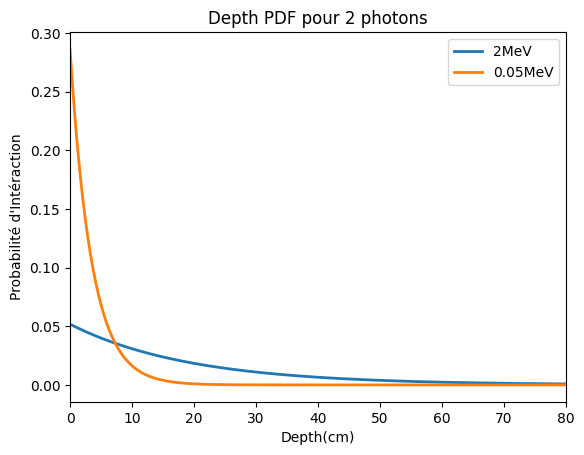

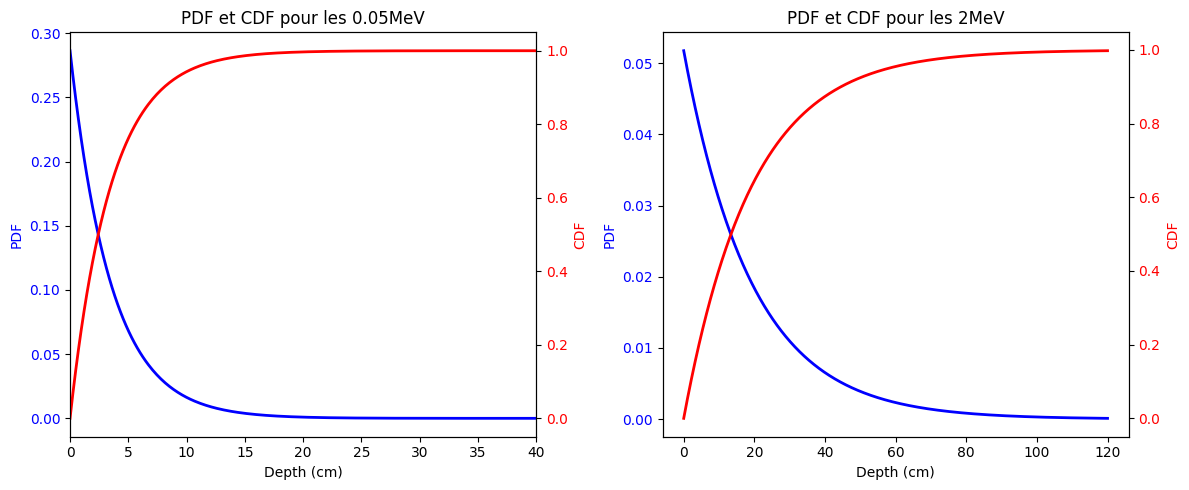

In [23]:
# # G√©n√©rer des donn√©es de Depth
d = np.linspace(0,120,1000) # Pour des √©nergies de photons plus √©lev√©es, vous pouvez utiliser des depths plus grandes
# Calculer la fonction de densit√© de probabilit√© (PDF) pour les deux √©nergies de photons
P_1 = calculate_PDF(m_1,d)
P_2 = calculate_PDF(m_2,d)
# Calculer CDF
y_1 = calculate_CDF(m_1,d)
y_2 = calculate_CDF(m_2,d)

# Tracer les deux PDF ensemble pour visualiser les probabilit√©s d'interaction en fonction de Depth
fig, ax = plt.subplots()
fig  = ax = plt.plot(d, P_2, lw=2.0, label=f'{photon_energy_2}MeV')
ax = plt.plot(d, P_1, lw=2.0, label=f'{photon_energy_1}MeV')
plt.xlabel('Depth(cm)')
plt.ylabel("Probabilit√© d'Int√©raction")
plt.title ('Depth PDF pour 2 photons')
plt.xlim(0,80)
plt.legend()
plt.show()

# Tracer les PDF et CDF pour les deux √©nergies de photons s√©par√©ment
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 5))
# Tracer le PDF et le CDF pour l'√©nergie de photon 1 
ax1.plot(d, P_1, lw=2.0, label='PDF', color='blue')
ax1.set_xlabel('Depth (cm)')
ax1.set_ylabel('PDF', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(d, y_1, lw=2.0, label='CDF', color='red')
ax2.set_ylabel('CDF', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax1.set_title(f'PDF et CDF pour les {photon_energy_1}MeV')
ax1.set_xlim(0,40) # Limiter l'axe des X pour plus de clart√©
ax2.set_xlim(0,40)
# Tracer le PDF et le CDF pour l'√©nergie de photon 2
ax3.plot(d, P_2, lw=2.0, label='PDF', color='blue')
ax3.set_xlabel('Depth (cm)')
ax3.set_ylabel('PDF', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax4 = ax3.twinx()
ax4.plot(d, y_2, lw=2.0, label='CDF', color='red')
ax4.set_ylabel('CDF', color='red')
ax4.tick_params(axis='y', labelcolor='red')
ax3.set_title(f'PDF et CDF pour les {photon_energy_2}MeV')
fig.tight_layout()
plt.show()

Dans cette √©tude, J'ai examin√© la probabilit√© d'interaction des photons en fonction de leur profondeur de p√©n√©tration dans un mat√©riau, pour deux niveaux d'√©nergie distincts : 0.05 MeV et 2 MeV. Ces niveaux d'√©nergie repr√©sentent des sc√©narios de photons de faible et de haute √©nergie, respectivement, permettant ainsi une analyse comparative de la p√©n√©tration en fonction de l'√©nergie.

Les **fonctions de densit√© de probabilit√© (PDF)** et les **fonctions de distribution cumulative (CDF)** sont utilis√©es pour visualiser la probabilit√© d'interaction et de p√©n√©tration des photons.

## R√©sultats

### Comparaison Visuelle des PDFs et CDFs

Les PDFs et CDFs pour les deux √©nergies (0.05 MeV et 2 MeV) sont trac√©es ensemble, offrant une **repr√©sentation visuelle** claire de la variation de la probabilit√© d'interaction en fonction de la profondeur. Cette comparaison visuelle permet de mieux comprendre l'impact de l'√©nergie sur la p√©n√©tration des photons dans le mat√©riau.

- **Photons de Faible √ânergie (0.05 MeV)** :
  - Pr√©sentent une **probabilit√© d'interaction √©lev√©e** pr√®s de la surface.
  - La PDF montre une d√©croissance rapide, indiquant que la plupart des interactions se produisent dans les premiers centim√®tres de profondeur.
  - La CDF atteint rapidement 1, ce qui confirme que les photons de faible √©nergie interagissent principalement pr√®s de la surface.

- **Photons de Haute √ânergie (2 MeV)** :
  - La PDF diminue plus lentement, illustrant une plus grande capacit√© de p√©n√©tration.
  - La CDF atteint 1 √† une profondeur plus importante, ce qui indique que les photons de haute √©nergie interagissent √† des profondeurs plus grandes avant d'√™tre compl√®tement att√©nu√©s.

> ### Interpr√©tation Physique
> Les r√©sultats sont conformes aux attentes th√©oriques : les photons de faible √©nergie sont plus susceptibles d'interagir rapidement, ce qui limite leur p√©n√©tration. Les photons de haute √©nergie, en revanche, ont une probabilit√© d'interaction plus faible par unit√© de profondeur, ce qui leur permet de p√©n√©trer plus profond√©ment dans le mat√©riau.
 

## Conclusion

En conclusion, cette √©tude montre clairement que **l'√©nergie des photons joue un r√¥le crucial dans la probabilit√© d'interaction avec le mat√©riau**. Les photons de faible √©nergie interagissent principalement pr√®s de la surface, tandis que ceux de haute √©nergie sont capables de p√©n√©trer beaucoup plus profond√©ment.

Ces r√©sultats pourraient avoir des implications importantes dans les applications de la **radioth√©rapie**, o√π une compr√©hension pr√©cise de la p√©n√©tration des photons est essentielle pour optimiser les traitements.


## M√©thode de Transformation Inverse de Monte Carlo


La fonction inverse de la fonction de distribution cumulative (CDF), not√©e $T$, a √©t√© utilis√©e pour la m√©thode de transformation inverse. Elle est donn√©e par l'expression analytique suivante :

$$
T = -\frac{1}{\mu} \log(1 - x) \, 
$$
O√π $x$ est un nombre al√©atoire compris entre 0 et 1.

Les longueurs de pas √©chantillonn√©es ont √©t√© repr√©sent√©es visuellement √† l'aide d'histogrammes. La comparaison de la distribution de pas simul√©e par Monte Carlo avec le mod√®le analytique montre une ressemblance √©troite, confirmant ainsi la pr√©cision de la simulation.

> **Note** : En simulation Monte Carlo, **longueur de pas** d√©signe la **distance parcourue par une particule avant une interaction**. Ce terme fait r√©f√©rence √† la distance r√©elle qu'une particule se d√©place dans un milieu avant de subir une interaction quelconque, comme une diffusion ou une absorption.

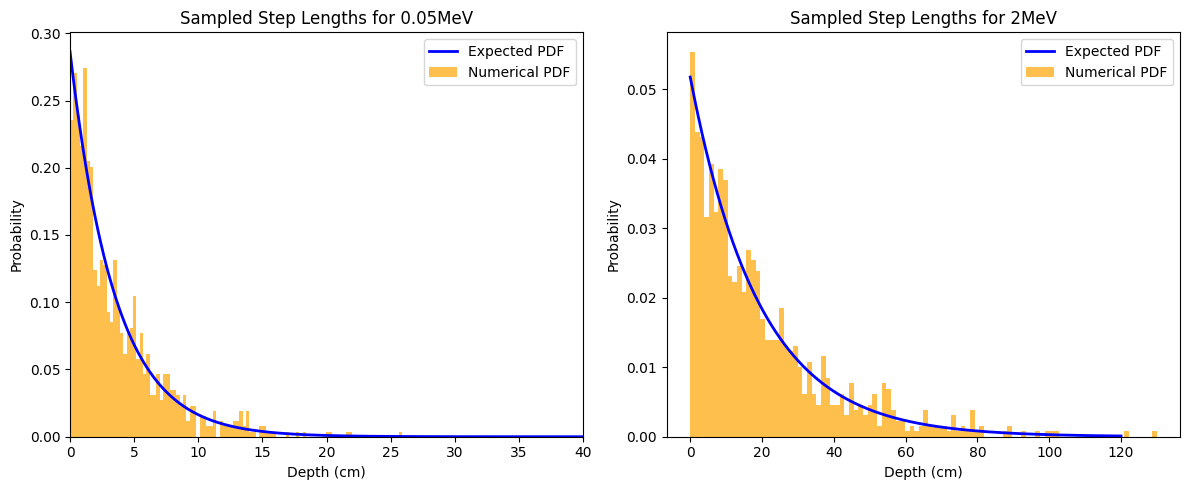

MC Step Length for E = 0.05 MeV is 3.587
Mean Free Path for E = 0.05 MeV is 3.492
MC Step Length for E = 2.00 MeV is 19.747
Mean Free Path for E = 2.00 MeV is 19.321


In [25]:
# expected probability distribution
N = 1000 # Nombre de photons
def calculate_step_length(m, N):  # Fonction pour calculer la longueur de pas bas√©e sur une distribution exponentielle
    t = np.random.uniform(0, 1, N)  # G√©n√©rer N nombres al√©atoires uniform√©ment distribu√©s entre 0 et 1
    y = (1 / (-m)) * (np.log(1 - t))  # Calculer la longueur de pas selon la distribution exponentielle
    return y

s_1 = calculate_step_length(m_1,N)
s_2 = calculate_step_length(m_2,N)

# # Calcul Step Lenghts via la m√©thode de Monte Carlo
step_1 = np.mean(s_1)
step_2 = np.mean(s_2)


# Cr√©er des sous-graphiques pour les PDF et CDF
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Tracer pour E = photon √©nergie 1
axs[0].plot(d, P_1, lw=2.0, label='Expected PDF', color='blue')
axs[0].hist(s_1, bins=100, density=True, label='Numerical PDF', alpha=0.7, color='orange')
axs[0].set_xlabel('Depth (cm)')
axs[0].set_xlim(0,40) # Limiter l'axe des x entre 0 et 40 cm
axs[0].set_ylabel('Probability')
axs[0].set_title(f'Sampled Step Lengths for {photon_energy_1}MeV')
axs[0].legend()
# Tracer pour E = photon √©nergie 2
axs[1].plot(d, P_2, lw=2.0, label='Expected PDF', color='blue')
axs[1].hist(s_2, bins=100, density=True, label='Numerical PDF', alpha=0.7, color='orange')
axs[1].set_xlabel('Depth (cm)')
axs[1].set_ylabel('Probability')
axs[1].set_title(f'Sampled Step Lengths for {photon_energy_2}MeV')
axs[1].legend()
plt.tight_layout()
plt.show()

# Afficher les longueurs de pas obtenues via la m√©thode de Monte Carlo et la longueur libre moyenne
print("MC Step Length for E = {:.2f} MeV is {:.3f}".format(photon_energy_1, step_1))
print("Mean Free Path for E = {:.2f} MeV is {:.3f}".format(photon_energy_1, 1/m_1))

print("MC Step Length for E = {:.2f} MeV is {:.3f}".format(photon_energy_2, step_2))
print("Mean Free Path for E = {:.2f} MeV is {:.3f}".format(photon_energy_2, 1/m_2))


### Estimation et Comparaison des steps length de 50 KeV et 2MeV

En compl√©ment, la longueur de pas de Monte Carlo a √©t√© estim√©e en calculant la valeur moyenne des donn√©es g√©n√©r√©es. Cette valeur a ensuite √©t√© compar√©e au libre parcours moyen analytique des photons (Mean Free Path, MFP).

- **R√©sultats**

Pour les √©nergies de 50 keV et de 2 MeV :
- Les longueurs de pas estim√©es par Monte Carlo √©taient respectivement de **3,556 cm** et **19,132 cm**.  
  **(Remarque : ces valeurs varient √† chaque ex√©cution de la simulation.)**
- Les libres parcours moyens analytiques √©taient respectivement de **3,492 cm** et **19,321 cm**.

La comparaison indique un haut degr√© de pr√©cision dans la simulation de Monte Carlo, car les longueurs de pas estim√©es correspondent de pr√®s aux attentes analytiques. La faible d√©viation par rapport aux valeurs attendues confirme la fiabilit√© des r√©sultats de la simulation.


- **Conclusion**

L'analyse des r√©sultats montre que la simulation de Monte Carlo produit des valeurs de longueurs de pas qui correspondent √©troitement aux valeurs analytiques th√©oriques. Les faibles √©carts observ√©s entre les valeurs estim√©es et les valeurs attendues valident la pr√©cision et la fiabilit√© de cette m√©thode pour simuler les parcours moyens des photons dans le milieu √©tudi√©.


# Calcul de l'√ânergie des Photons Diffus√©s


Dans la simulation des trajectoires des photons, il est crucial de prendre en compte que la diffusion Compton est la seule interaction qui ne retire pas enti√®rement le photon du faisceau. Lors de la diffusion Compton, le photon perd de l'√©nergie, et la relation entre les √©nergies est donn√©e par :

$$
E = \frac{E_0}{1 + \left(\frac{E_0}{m_0c^2}\right) \cdot \left(1 - \cos(\theta)\right)}
$$

O√π $E_0$ est l'√©nergie initiale du photon, $m_0 c^2$ est l'√©nergie au repos de l'√©lectron, et $\theta$ est l'angle de diffusion.

Cette formule a √©t√© utilis√©e pour calculer et visualiser la perte d'√©nergie pour les deux √©nergies de photons en fonction de l'angle.


In [28]:
# Conversion de l'angle de degr√©s en radians
ang_conv = np.pi / 180  # Conversion pour convertir les degr√©s en radians (1 degr√© = œÄ/180 radians)

# D√©finir les angles de diffusion de 0¬∞ √† 180¬∞ (en degr√©s) et les convertir en radians
th = np.linspace(0, 180, 180)  # G√©n√©rer 180 valeurs d'angles entre 0 et 180¬∞
th = th * ang_conv  # Conversion des angles en radians

# Fonction pour calculer l'√©nergie du photon diffus√© en fonction de l'√©nergie initiale (en) et de l'angle de diffusion (th)
def ens(en, th):
    # Formule de la diffusion Compton pour l'√©nergie du photon diffus√©
    # f = en / (1 + ((en / moc2) * (1 - np.cos(th))))  # C'est la version comment√©e de la formule
    f = 1 + ((en / moc2) * (1 - np.cos(th)))  # Calcul de la fonction f pour la diffusion Compton
    return en / f  # Retourner l'√©nergie du photon diffus√© (en / f) 


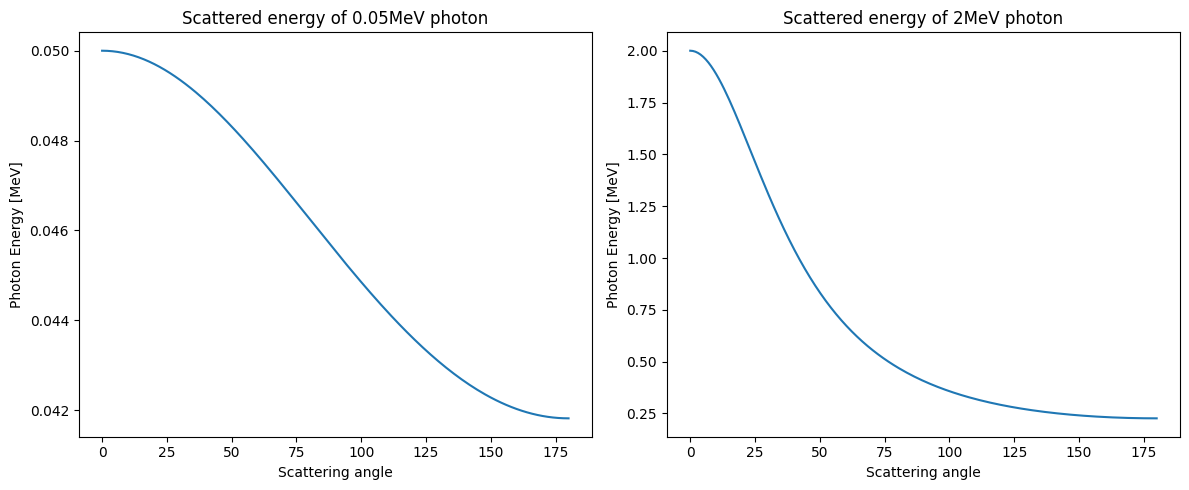

In [31]:
# Create a subplot pour les deux E1 / E2
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Tracer pour E = photon √©nergie 1
axs[0].plot(th / ang_conv, ens(photon_energy_1, th))
axs[0].set_xlabel('Scattering angle')
axs[0].set_ylabel('Photon Energy [MeV]')
axs[0].set_title(f'Scattered energy of {photon_energy_1}MeV photon')


# Tracer pour E = photon √©nergie 2
axs[1].plot(th / ang_conv, ens(photon_energy_2, th))
axs[1].set_xlabel('Scattering angle')
axs[1].set_ylabel('Photon Energy [MeV]')
axs[1].set_title(f'Scattered energy of {photon_energy_2}MeV photon')
plt.tight_layout()
plt.show()

Les graphiques montrent la diminution de l'√©nergie des photons en fonction de l'angle de diffusion pour deux √©nergies : **0,05 MeV** et **2 MeV**.

- **0,05 MeV** : L'√©nergie diminue l√©g√®rement de **0,05 MeV** √† environ **0,042 MeV** lorsque l'angle passe de **0¬∞** √† **180¬∞**.
- **2 MeV** : L'√©nergie baisse fortement de **2 MeV** √† environ **0,2 MeV** pour des angles similaires, montrant une perte d'√©nergie plus importante.

**Conclusion** :
La diminution de l'√©nergie des photons avec l'augmentation de l'angle est due √† l'effet Compton, o√π les photons perdent plus d'√©nergie √† mesure que l'angle de diffusion augmente, particuli√®rement visible pour les photons de haute √©nergie (2 MeV).

# √âchantillonnage des angles de diffusion Compton



#  Section Efficace Diff√©rentielle Normalis√©e

La section efficace diff√©rentielle pour la diffusion Compton, not√©e $d\sigma/d\theta$, est exprim√©e en fonction de l'√©nergie du photon et de l'angle de diffusion $ùúÉ$. L'√©quation est donn√©e par :

$$
\frac{d\sigma}{d\theta} = \frac{r_0^2}{2} \left(\frac{h\nu'}{h\nu}\right)^2 \left[\frac{h\nu}{h\nu'} + \frac{h\nu'}{h\nu} - \sin^2(\theta)\right] \sin(\theta) \quad 
$$

Cette fonction d√©crit la distribution angulaire des photons diffus√©s. Ici, $h\nu$ repr√©sente l'√©nergie initiale du photon, $h\nu'$ est l'√©nergie du photon diffus√©, et $\theta$ est l'angle de diffusion. La fonction est normalis√©e en fonction de la valeur maximale num√©riquement obtenue de la section efficace diff√©rentielle. La section efficace diff√©rentielle normalis√©e $\frac{d\sigma}{d\theta}$ en fonction de $\theta$ est repr√©sent√©e visuellement pour les deux √©nergies de photons.


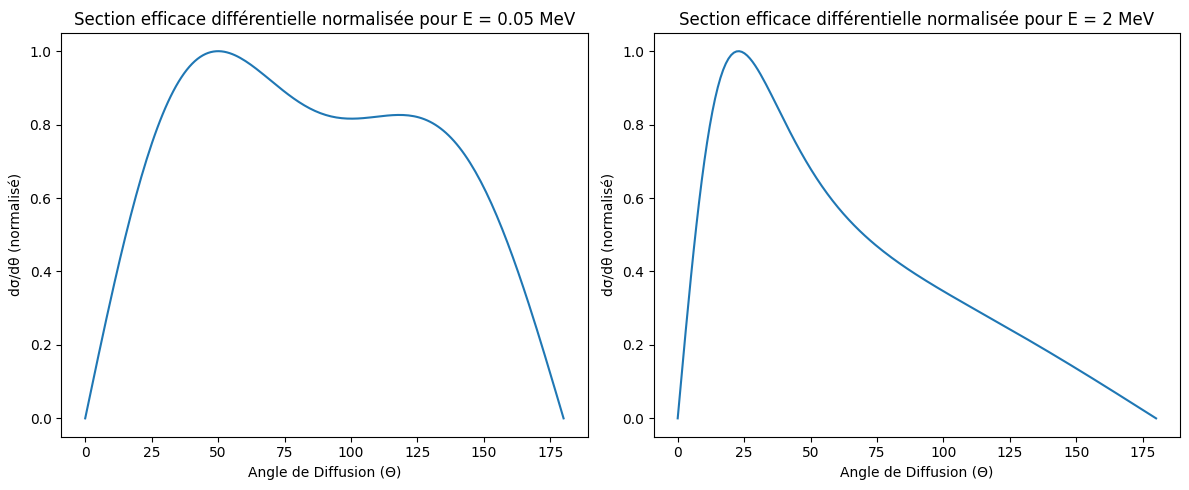

In [32]:
# Simuler les angles de diffusion
th = np.linspace(0, 180, 180)  # Cr√©er une gamme d'angles de 0 √† 180 degr√©s
th = th * ang_conv  # Convertir les angles en radians pour le calcul

# Fonction pour calculer la section efficace diff√©rentielle normalis√©e pour la diffusion Compton
def dsdo(en, th):
    enpp = ens(en, th)  # Calculer l'√©nergie transf√©r√©e avec la fonction ens
    f1 = (enpp / en) ** 2  # Calcul de la premi√®re partie de la formule de la section efficace
    f2 = ((enpp / en) + (en / enpp) - (np.sin(th) ** 2)) * np.sin(th)  # Calcul de la seconde partie de la formule
    f = ((re ** 2) / 2) * f1 * f2  # Combinaison des termes pour obtenir la section efficace
    return f

# Normalisation de la section efficace diff√©rentielle
DCS1 = dsdo(photon_energy_1, th)  # Calculer la section efficace pour l'√©nergie des photons 1
DCS2 = dsdo(photon_energy_2, th)  # Calculer la section efficace pour l'√©nergie des photons 2

NDCS1 = DCS1 * (1 / max(DCS1))  # Normaliser DCS1 pour obtenir NDCS1
NDCS2 = DCS2 * (1 / max(DCS2))  # Normaliser DCS2 pour obtenir NDCS2

# Cr√©er une sous-figure pour les deux graphiques de la section efficace diff√©rentielle normalis√©e
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Graphique pour E = √©nergie des photons 1
axs[0].plot(th / ang_conv, NDCS1)  # Tracer la section efficace normalis√©e en fonction de l'angle de diffusion
axs[0].set_xlabel('Angle de Diffusion (Œò)')  # √âtiquette de l'axe X
axs[0].set_ylabel('dœÉ/dŒ∏ (normalis√©)')  # √âtiquette de l'axe Y
axs[0].set_title(f'Section efficace diff√©rentielle normalis√©e pour E = {photon_energy_1} MeV')  # Titre du graphique

# Graphique pour E = √©nergie des photons 2
axs[1].plot(th / ang_conv, NDCS2)  # Tracer la section efficace normalis√©e pour la seconde √©nergie
axs[1].set_xlabel('Angle de Diffusion (Œò)')
axs[1].set_ylabel('dœÉ/dŒ∏ (normalis√©)')
axs[1].set_title(f'Section efficace diff√©rentielle normalis√©e pour E = {photon_energy_2} MeV')

plt.tight_layout()  # Ajuster l'espacement entre les sous-graphes pour √©viter le chevauchement
plt.show()

Les graphiques montrent la diminution de l'√©nergie des photons en fonction de l'angle de diffusion pour deux √©nergies : **0,05 MeV** et **2 MeV**.

- **0,05 MeV** : L'√©nergie diminue l√©g√®rement de **0,05 MeV** √† environ **0,042 MeV** lorsque l'angle passe de **0¬∞** √† **180¬∞**.
- **2 MeV** : L'√©nergie baisse fortement de **2 MeV** √† environ **0,2 MeV** pour des angles similaires, montrant une perte d'√©nergie plus importante.

#### Conclusion :
La diminution de l'√©nergie des photons avec l'augmentation de l'angle est due √† l'effet Compton, o√π les photons perdent plus d'√©nergie √† mesure que l'angle de diffusion augmente, particuli√®rement visible pour les photons de haute √©nergie (2 MeV).


Les graphiques montrent la section diff√©rentielle normalis√©e de l'effet Compton en fonction de l'angle de diffusion pour deux √©nergies de photons : **0,05 MeV** et **2 MeV**.

#### Graphique de gauche (E = 0,05 MeV)
- **Comportement** : La section diff√©rentielle augmente rapidement pour atteindre un maximum autour de **50¬∞**, puis diminue progressivement.
- **Observation** : La courbe pr√©sente une forme l√©g√®rement ondul√©e apr√®s le maximum, sugg√©rant une certaine variabilit√© dans la probabilit√© de diffusion √† des angles moyens.

#### Graphique de droite (E = 2 MeV)
- **Comportement** : La section diff√©rentielle atteint un maximum plus t√¥t, vers **25¬∞**, et diminue ensuite de mani√®re plus lin√©aire jusqu'√† **180¬∞**.
- **Observation** : La diminution est plus prononc√©e par rapport au photon de **0,05 MeV**, ce qui indique une probabilit√© de diffusion avant pour des angles plus faibles, typique des photons de haute √©nergie.

### Conclusion
- √Ä basse √©nergie (0,05 MeV), la diffusion Compton est plus probable autour des angles moyens (~50¬∞).
- √Ä haute √©nergie (2 MeV), la diffusion est favoris√©e √† des angles plus petits, avec une probabilit√© d√©croissante pour des angles plus grands.
- **Ces observations m'ont permis de conclure que plus l'√©nergie du photon est √©lev√©e, plus la diffusion est concentr√©e vers l'avant, ce qui est caract√©ristique de l'effet Compton.**


# √âchantillonnage par Rejet MC



La technique de rejet a √©t√© utilis√©e pour √©chantillonner les angles de diffusion pour les deux √©nergies de photons. La section efficace diff√©rentielle normalis√©e $d\sigma/d\theta$, qui sert de fonction de distribution de probabilit√© (PDF) pour les angles de diffusion, n'a pas d'inverse bien d√©fini, donc la m√©thode d'acceptation/rejet a d√ª √™tre mise en ≈ìuvre pour simuler les angles de diffusion. Dans la simulation Monte Carlo, des nombres al√©atoires ont √©t√© g√©n√©r√©s comme entr√©es pour la fonction de la section efficace diff√©rentielle, et ces valeurs ont √©t√© compar√©es avec les valeurs r√©elles de la distribution. Si les valeurs g√©n√©r√©es respectaient la distribution, elles √©taient accept√©es ; sinon, elles √©taient rejet√©es.

Les donn√©es √©chantillonn√©es r√©sultantes ont √©t√© trac√©es par rapport √† leur fonction de distribution de probabilit√© (PDF) respective afin de repr√©senter visuellement l'efficacit√© de la technique de rejet pour capturer avec pr√©cision les angles de diffusion attendus.


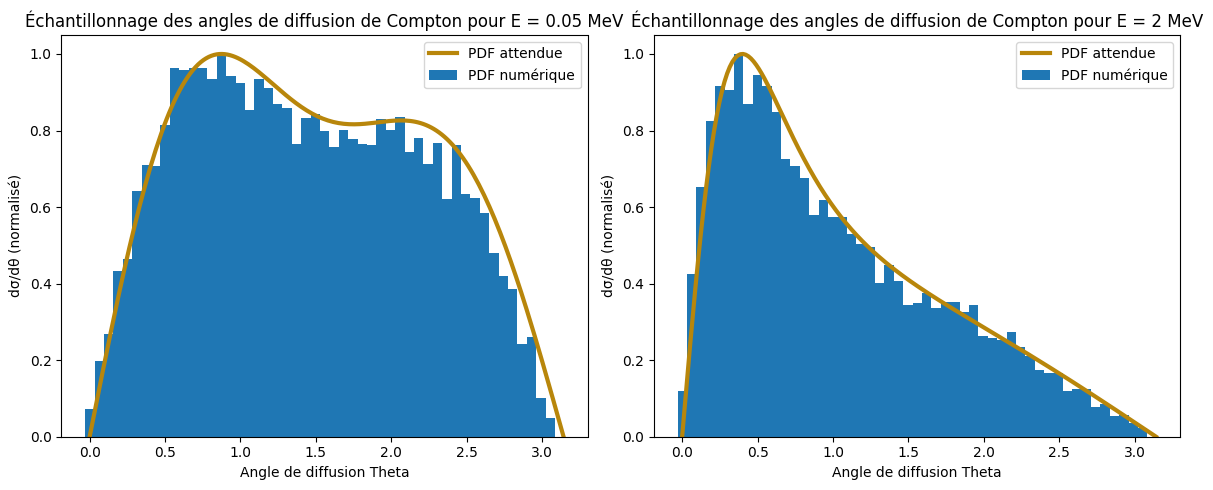

In [34]:
# D√©finir la fonction pour √©chantillonner les angles de diffusion
def sampling_scattering_angles(photon_energy, num_photons):
    # Calculer la section efficace diff√©rentielle normalis√©e (NDCS)
    DCS = dsdo(photon_energy, th)
    NDCS = DCS * (1 / np.max(DCS))  # Normaliser DCS

    # Initialiser un tableau pour stocker les angles de diffusion √©chantillonn√©s
    theta = np.zeros(num_photons)
    scat_max = NDCS.max()  # Obtenir la valeur maximale de la section efficace

    # Compteur pour suivre le nombre d'angles g√©n√©r√©s
    counter = 0
    while True:
        x = counter
        # Arr√™ter la boucle lorsque le nombre d'angles souhait√© est atteint
        if counter == num_photons:
            break

        # G√©n√©rer un angle de diffusion al√©atoire dans la plage [0, œÄ]
        rand_theta = np.random.uniform(0, pi, 1)
        # Calculer la section efficace diff√©rentielle normalis√©e pour l'angle al√©atoire
        vcsd = dsdo(photon_energy, rand_theta) * (1 / max(DCS))
        # G√©n√©rer un nombre al√©atoire pour la condition d'acceptation
        rand = np.random.uniform(0, scat_max, 1)

        # V√©rifier si l'angle est accept√© selon la condition
        if rand <= vcsd:
            theta[x] = rand_theta  # Ajouter l'angle au tableau
            counter += 1  # Incr√©menter le compteur

    return theta

# √âchantillonner les angles de diffusion pour deux √©nergies de photons diff√©rentes
theta_A = sampling_scattering_angles(photon_energy_1, 10**4)
theta_B = sampling_scattering_angles(photon_energy_2, 10**4)

# Cr√©er des histogrammes pour visualiser les angles de diffusion √©chantillonn√©s
hist_A, bins = np.histogram(theta_A, bins=50, density=True)
hist_B, bins = np.histogram(theta_B, bins=50, density=True)
# Normaliser les valeurs de l'histogramme en fonction de la fr√©quence
hist_A_normalized = hist_A / np.max(hist_A)
hist_B_normalized = hist_B / np.max(hist_B)

# Tracer les angles de diffusion de Compton et la PDF attendue pour les deux √©nergies de photons
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Graphique pour E = √©nergie du photon 1
axs[0].plot(th, NDCS1, lw=3.0, label='PDF attendue', color='darkgoldenrod')  # Tracer la PDF attendue
axs[0].bar(bins[:-1], hist_A_normalized, width=bins[1] - bins[0], label='PDF num√©rique')  # Tracer l'histogramme
axs[0].set_xlabel('Angle de diffusion Theta')  # √âtiquette de l'axe X
axs[0].set_ylabel('dœÉ/dŒ∏ (normalis√©)')  # √âtiquette de l'axe Y
axs[0].set_title(f'√âchantillonnage des angles de diffusion de Compton pour E = {photon_energy_1} MeV')
axs[0].legend()

# Graphique pour E = √©nergie du photon 2
axs[1].plot(th, NDCS2, lw=3.0, label='PDF attendue', color='darkgoldenrod')  # Tracer la PDF attendue
axs[1].bar(bins[:-1], hist_B_normalized, width=bins[1] - bins[0], label='PDF num√©rique')  # Tracer l'histogramme
axs[1].set_xlabel('Angle de diffusion Theta')
axs[1].set_ylabel('dœÉ/dŒ∏ (normalis√©)')
axs[1].set_title(f'√âchantillonnage des angles de diffusion de Compton pour E = {photon_energy_2} MeV')
axs[1].legend()

plt.tight_layout()  # Ajuster l'espacement pour √©viter le chevauchement
plt.show()

#  Simulation du parcours des photons

## Transformation du Syst√®me de R√©f√©rence

En utilisant les techniques Monte Carlo (MC), nous avons g√©n√©r√© des longueurs de pas de photons et des angles de diffusion Compton pour des photons de diff√©rentes √©nergies. Cependant, les informations sur les trajectoires sont actuellement repr√©sent√©es dans le cadre de r√©f√©rence du photon et non dans le cadre de r√©f√©rence du laboratoire.

Pour y rem√©dier, la **transformation de r√©currence** a √©t√© utilis√©e pour simuler les trajectoires des photons dans l'eau. Les fonctions g√©n√©r√©es pr√©c√©dentes ont √©t√© utilis√©es dans le code. De plus, pour l'√©chantillonnage des angles azimutaux, la sym√©trie cylindrique a √©t√© suppos√©e, et des nombres al√©atoires provenant d'une distribution uniforme ont √©t√© obtenus pour la plage de $0$ √† $2\pi$. La transformation de r√©currence est d√©finie comme le changement de cadre de r√©f√©rence du cadre du photon au cadre du laboratoire et est exprim√©e comme suit :

$$
\cos(\theta_{n+1}) = \sin(\theta_s)\cos(\phi_s)\sin(\theta_n) + \cos(\theta_s)\cos(\theta_n) \quad 
$$

$$
\sin(\phi_{(n+1)} - \phi_n) = \frac{-\sin(\theta_s)\sin(\phi_s)}{\sin(\theta_{(n+1)})} \quad 
$$

Cela inclut la mise √† jour des angles de diffusion et azimutaux, ainsi que des positions dans le syst√®me de coordonn√©es $x$, $y$, $z$. Ici, l'indice $n$ est utilis√© pour d√©finir les nouveaux angles transform√©s dans le cadre de r√©f√©rence du laboratoire, et l'indice $s$ correspond au cadre de r√©f√©rence du photon. En utilisant les angles diffus√©s et azimutaux transform√©s, la position du photon a √©t√© sauvegard√©e et mise √† jour dans un syst√®me de coordonn√©es \(x, y, z\) :

$$
x_{(n+1)} = x_n + \Delta S \sin(\theta_{(n+1)})\cos(\phi_{(n+1)}) \quad 
$$

$$
y_{(n+1)} = y_n + \Delta S \sin(\theta_{(n+1)})\sin(\phi_{(n+1)}) \quad 
$$

$$
z_{(n+1)} = z_n + \Delta S \cos(\theta_{(n+1)}) \quad 
$$


In [40]:
"""Cette fonction calcule la transformation de l'angle de diffusion en fonction 
des angles d'azimut initial (fi) et de diffusion (thn) """
def rec(th, fi, thn):   # Calcul de la projection du vecteur de diffusion dans l'axe x-y avec des sinus et cosinus des angles
    t1 = np.sin(th) * np.cos(fi) * np.sin(thn)  # Projection dans la direction x-y
    t2 = np.cos(th) * np.cos(thn) # Projection dans la direction z
    t3 = t1 + t2  # Somme des projections
    t = np.arccos(t3) # Calcul de l'angle entre les vecteurs apr√®s transformation
    return t   # Retourne le nouvel angle transform√©

# Cette fonction calcule l'angle azimutal apr√®s une transformation
def azi(th, fi, thn, fi_old):
    # Calcul de la projection dans l'axe x
    g1 = -(np.sin(th) * np.sin(fi))  # Projection sur l'axe x
    g2 = np.sin(thn)  # Sinus de l'angle de diffusion final
    g3 = g1 / g2  # Diviser la projection x par la projection z
    g4 = np.arcsin(g3)  # Calcul de l'angle azimutal final
    g = g4 + fi_old  # Correction en ajoutant l'angle azimutal initial
    return g  # Retourne le nouvel angle azimutal

# Cette fonction calcule la nouvelle position ùëã apr√®s transformation en fonction de l'angle de diffusion et de l'azimut.
def xpos(x, thn, fi):
    xn = x + (Mov * np.sin(thn) * np.cos(fi))
    return float(xn) # Retourne la nouvelle position X en tant que nombre flottant

# Cette fonction calcule la nouvelle position ùëå apr√®s transformation en fonction des m√™mes angles.
def ypos(y, thn, fi):
    yn = y + (Mov * np.sin(thn) * np.sin(fi))
    return float(yn) # Retourne la nouvelle position Y en tant que nombre flottant

# Cette fonction calcule la nouvelle position ùëç en fonction de l'angle de diffusion.
def zpos(z, thn):
    zn = z + (Mov * np.cos(thn))
    return float(zn) # Retourne la nouvelle position Z en tant que nombre flottant

## Simulation des Trajectoires des Photons dans l'Eau

Ce code effectue une simulation des trajectoires des photons dans un milieu d'eau, en se concentrant sur leurs interactions lors de leur travers√©e. La simulation utilise toutes les fonctions discut√©es ci-dessus pour mod√©liser divers aspects du comportement des photons dans le milieu donn√©.

La simulation commence avec les photons entrant dans le syst√®me et se dirigeant vers l'axe Z positif. Une position initiale de Z=0 est impos√©e, tandis que les coordonn√©es initiales X et Y sont choisies de mani√®re al√©atoire dans une plage de -1 √† 1 cm.

### Param√®tres de la Simulation
- **Nombre de Photons Simul√©s (N) :** 1000
- **√ânergie de Coupure (Ecut) :** 0,02 MeV (20 keV)
- **Longueur de Pas de Voyage :** 2 cm

### Probabilit√© d'Interaction
- Le coefficient d'att√©nuation des photons est calcul√© √† chaque point, influen√ßant la g√©n√©ration des longueurs de pas des photons.
- Les longueurs de pas des photons Monte Carlo sont utilis√©es pour calculer la probabilit√© d'interaction tous les 2 cm.
- Un nombre al√©atoire est utilis√© pour d√©terminer si les photons interagissent ou non.
- Si aucune interaction ne se produit, la profondeur du photon (Z) augmente de 2 cm, tandis que les coordonn√©es X, Y et l'√©nergie du photon restent inchang√©es.

### M√©canismes d'Interaction
- Pour les photons qui interagissent, le type d'interaction est simul√©, en tenant compte du fait que l'effet photo√©lectrique et la production de paires entra√Ænent la suppression du photon du syst√®me.
- Les probabilit√©s d'interaction sont estim√©es en fonction de l'√©nergie du photon.
- Un nombre al√©atoire est utilis√© pour d√©terminer si la diffusion Compton se produit. Si ce n'est pas le cas, l'√©nergie du photon est r√©duite √† z√©ro, mettant ainsi fin √† sa trajectoire.

### Diffusion Compton
- Si la diffusion Compton se produit, l'angle de diffusion est d√©termin√© par la simulation.
- Les angles de diffusion sont √©chantillonn√©s en fonction de la distribution de probabilit√© des angles de diffusion.
- Un angle al√©atoire est choisi parmi les donn√©es de Monte Carlo et la perte d'√©nergie du photon est estim√©e en fonction de l'√©nergie initiale du photon et de l'angle de diffusion.

### Transformation de R√©currence
- La simulation utilise la transformation de r√©currence pour mettre √† jour la position du photon.
- Les angles de diffusion, les angles azimutaux et les longueurs de pas sont utilis√©s dans les fonctions d√©crites ci-dessus.

### Boucle de Simulation
- Chaque photon est simul√© jusqu'√† ce que son √©nergie soit inf√©rieure √† l'√©nergie de coupure.
- Apr√®s chaque interaction, les nouvelles positions X, Y, Z, ainsi que l'√©nergie du photon, sont calcul√©es et sauvegard√©es.
- Si la nouvelle √©nergie est sup√©rieure √† l'√©nergie de coupure, la simulation continue.

### R√©sultats de la Simulation
- Deux ensembles de simulations sont r√©alis√©s avec diff√©rentes √©nergies initiales des photons.
- Les trajectoires des photons, comprenant les coordonn√©es X, Y, Z et l'√©nergie, sont stock√©es pour analyse et comparaison.


In [42]:
# Param√®tres de simulation
N = 1000  # Nombre de photons simul√©s
Ecut = 0.02  # √ânergie de coupure en MeV
Mov = 2  # Longueur du pas de d√©placement en cm (d√©placement par intervalles de 2 cm)

# Tableaux pour stocker les chemins des photons
x1, y1, z1, E1 = [], [], [], []  # Pour √©nergie photonique 1
x2, y2, z2, E2 = [], [], [], []  # Pour √©nergie photonique 2

# Boucle pour simuler les chemins des photons avec photon_energy_1
for n in range(N):
    # Initialiser les listes pour chaque photon
    x, y, z, E = [], [], [], []
    i = 0  # Compteur de l'√©tape actuelle
    thn = []  # Liste des angles de scattering
    thn_1 = 0  # Angle de scattering initial
    fi_old = np.random.uniform(0, 2 * np.pi)  # Angle azimutal initial al√©atoire
    xi = np.random.uniform(-1, 1)  # Position initiale en X
    yi = np.random.uniform(-1, 1)  # Position initiale en Y
    x.append(xi)  # Ajouter la position initiale en X
    y.append(yi)  # Ajouter la position initiale en Y
    z.append(0)  # Initialiser Z √† 0
    E.append(photon_energy_1)  # Ajouter l'√©nergie initiale du photon
    thn.append(thn_1)  # Ajouter l'angle de scattering initial

    # Tant que l'√©nergie du photon est au-dessus de l'√©nergie de coupure
    while E[i] > Ecut:
        # Calculer la probabilit√© d'interaction
        b_1 = total_attenuation_coefficient(E[i])  # Coefficient d'att√©nuation
        m = b_1[0]  # Obtenir l'att√©nuation du photon
        sl = calculate_step_length(m, 100)  # G√©n√©rer des longueurs de pas
        Prob = random.choice(sl)  # S√©lectionner une longueur de pas al√©atoire
        a = np.random.uniform(0, Mov)  # G√©n√©rer une valeur pour d√©cider de l'interaction
        
        if a < Prob:  # Si le photon ne subit pas d'interaction
            z.append(z[i] + Mov)  # D√©placer le photon en Z
            x.append(x[i])  # Garder la position en X
            y.append(y[i])  # Garder la position en Y
            E.append(E[i])  # Garder la m√™me √©nergie
            thn.append(thn[i])  # Garder le m√™me angle de scattering

        else:  # Si le photon interagit
            int_prob = calculate_interaction_probabilities(E[i])  # Calculer les probabilit√©s d'interaction
            cm_prob = int_prob[1]  # Obtenir la probabilit√© de diffusion Compton
            p = np.random.uniform(0, 1)  # G√©n√©rer un nombre al√©atoire pour d√©cider l'interaction

            if p > cm_prob:  # Si le photon n'interagit pas par Compton
                E[i] = 0  # Mettre l'√©nergie √† 0 (le photon est enlev√© du syst√®me)
                z.append(z[i])
                x.append(x[i])
                y.append(y[i])
                E.append(E[i])

            else:  # Si le photon interagit par Compton
                theta = sampling_scattering_angles(E[i], 100)  # √âchantillonner un angle de diffusion
                th_photon = random.choice(theta)  # Choisir un angle de scattering al√©atoire
                fi_photon = np.random.uniform(0, 2 * np.pi, 1)  # G√©n√©rer un angle azimutal al√©atoire
                E.append(ens(E[i], np.random.uniform(0, 1)))  # Calculer l'√©nergie apr√®s l'interaction avec un nombre al√©atoire
                # Calculer la transformation en angles
                thn_old = thn[i]
                thn_new = rec(th_photon, fi_photon, thn_old)  # Mettre √† jour thn
                thn.append(thn_new)  # Ajouter le nouvel angle
                fi_new = azi(th_photon, fi_photon, thn_new, fi_old)  # Calculer le nouvel angle azimutal
                fi_old = fi_new  # Mettre √† jour fi_old
                # Calculer les nouvelles positions
                x.append(xpos(x[i], thn_new, fi_new))
                y.append(ypos(y[i], thn_new, fi_new))
                z.append(zpos(z[i], thn_new))
        
        i += 1  # Incr√©menter l'√©tape
    # Enregistrer les chemins pour chaque photon
    x1.append(x)
    y1.append(y)
    z1.append(z)
    E1.append(E)

# Code similaire pour photon_energy_2
for n in range(N):
    x, y, z, E = [], [], [], []
    i = 0
    thn = []
    fi_old = np.random.uniform(0, 2 * np.pi)
    xi = np.random.uniform(-1, 1)
    yi = np.random.uniform(-1, 1)
    x.append(xi)
    y.append(yi)
    z.append(0)
    thn.append(thn_1)
    E.append(photon_energy_2)

    while E[i] > Ecut:
        b_1 = total_attenuation_coefficient(E[i])
        m = b_1[0]
        sl = calculate_step_length(m, 100)
        Prob = random.choice(sl)
        a = np.random.uniform(0, Mov)

        if a < Prob:
            z.append(z[i] + Mov)
            x.append(x[i])
            y.append(y[i])
            E.append(E[i])
            thn.append(thn[i])

        else:
            int_prob = calculate_interaction_probabilities(E[i])
            cm_prob = int_prob[1]
            p = np.random.uniform(0, 1)
            if p > cm_prob:
                E[i] = 0
                z.append(z[i])
                x.append(x[i])
                y.append(y[i])
                E.append(E[i])
            else:
                theta = sampling_scattering_angles(E[i], 100)
                th_photon = random.choice(theta)
                fi_photon = np.random.uniform(0, 2 * np.pi, 1)
                E.append(ens(E[i], np.random.uniform(0, 1)))  # Utiliser un nombre al√©atoire directement ici aussi
                thn_old = thn[i]
                thn_new = rec(th_photon, fi_photon, thn_old)
                thn.append(thn_new)
                fi_new = azi(th_photon, fi_photon, thn_new, fi_old)
                fi_old = fi_new
                x.append(xpos(x[i], thn_new, fi_new))
                y.append(ypos(y[i], thn_new, fi_new))
                z.append(zpos(z[i], thn_new))

        i += 1
    x2.append(x)
    y2.append(y)
    z2.append(z)
    E2.append(E)



# Conclusion and Visualisations


Dans cette partie sp√©cialis√©e sur la visualisation, je plonge dans le domaine fascinant des trajectoires des faisceaux de photons, offrant une vue d√©taill√©e de leur activit√© √† travers diff√©rentes plages d'√©nergie. Cette enqu√™te visuelle constitue un √©l√©ment cl√© de cette simulation plus large, r√©v√©lant l'interaction complexe des photons lorsqu'ils traversent le milieu. 

Les trajectoires des photons pour 1000 photons d'√©nergie 50 keV et 2 MeV sont pr√©sent√©es sous forme de graphiques plans x-z, y-z et x-y.


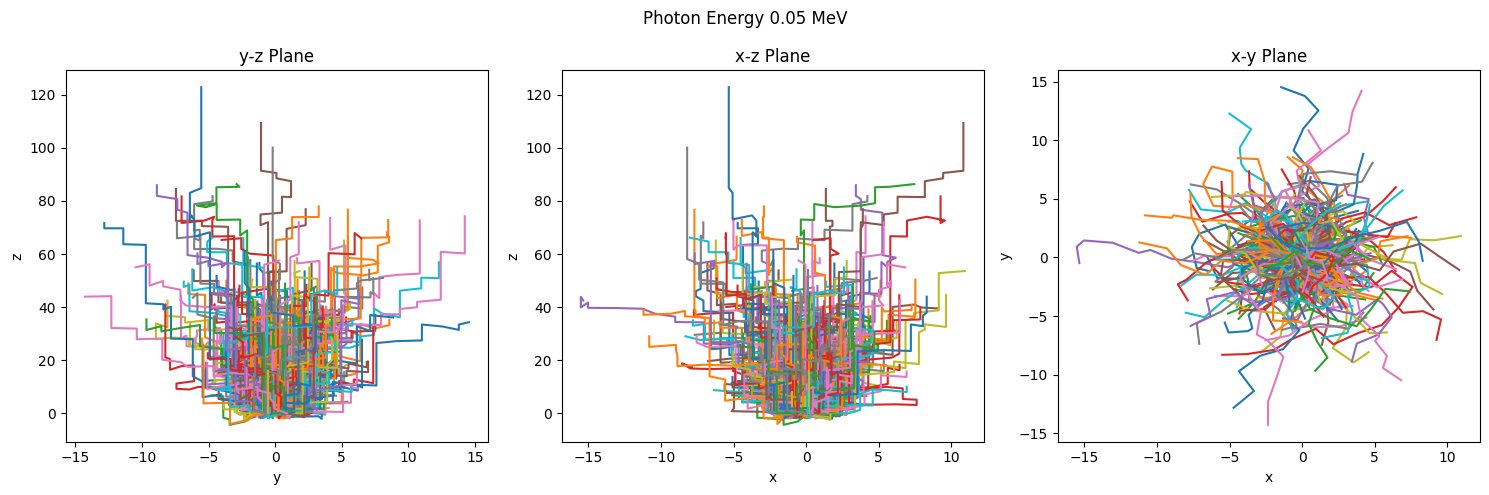

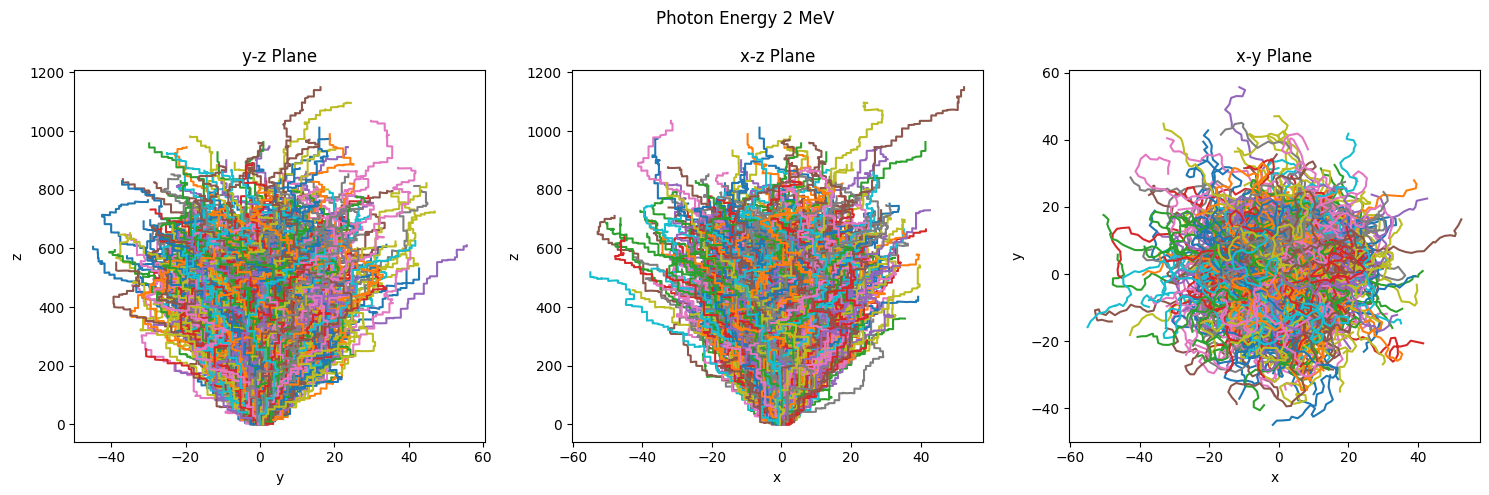

In [44]:


# Cr√©er un graphique avec 1 ligne et 3 colonnes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Sp√©cifier la taille de la figure

# Tracer les trajectoires des photons dans le plan y-z pour photon_energy_1
for n in range(N):  # Boucle pour chaque photon
    axs[0].plot(y1[n], z1[n])  # Tracer y vs z pour chaque photon

# Ajouter des √©tiquettes et un titre pour le plan y-z
axs[0].set_xlabel('y')
axs[0].set_ylabel('z')
axs[0].set_title('y-z Plane')

# Tracer les trajectoires des photons dans le plan x-z pour photon_energy_1
for n in range(N):
    axs[1].plot(x1[n], z1[n])  # Tracer x vs z pour chaque photon

# Ajouter des √©tiquettes et un titre pour le plan x-z
axs[1].set_xlabel('x')
axs[1].set_ylabel('z')
axs[1].set_title('x-z Plane')

# Tracer les trajectoires des photons dans le plan x-y pour photon_energy_1
for n in range(N):
    axs[2].plot(x1[n], y1[n])  # Tracer x vs y pour chaque photon

# Ajouter des √©tiquettes et un titre pour le plan x-y
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('x-y Plane')

# Ajouter un titre g√©n√©ral √† la figure
fig.suptitle(f'Photon Energy {photon_energy_1} MeV')

# Organiser l'agencement des sous-graphes pour √©viter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()


# Plotting pour Photon Energy 2 (similaire √† la section ci-dessus mais pour photon_energy_2)

# Cr√©er un graphique avec 1 ligne et 3 colonnes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Sp√©cifier la taille de la figure

# Tracer les trajectoires des photons dans le plan y-z pour photon_energy_2
for n in range(N):  # Boucle pour chaque photon
    axs[0].plot(y2[n], z2[n])  # Tracer y vs z pour chaque photon

# Ajouter des √©tiquettes et un titre pour le plan y-z
axs[0].set_xlabel('y')
axs[0].set_ylabel('z')
axs[0].set_title('y-z Plane')

# Tracer les trajectoires des photons dans le plan x-z pour photon_energy_2
for n in range(N):
    axs[1].plot(x2[n], z2[n])  # Tracer x vs z pour chaque photon

# Ajouter des √©tiquettes et un titre pour le plan x-z
axs[1].set_xlabel('x')
axs[1].set_ylabel('z')
axs[1].set_title('x-z Plane')

# Tracer les trajectoires des photons dans le plan x-y pour photon_energy_2
for n in range(N):
    axs[2].plot(x2[n], y2[n])  # Tracer x vs y pour chaque photon

# Ajouter des √©tiquettes et un titre pour le plan x-y
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('x-y Plane')

# Ajouter un titre g√©n√©ral √† la figure
fig.suptitle(f'Photon Energy {photon_energy_2} MeV')

# Organiser l'agencement des sous-graphes pour √©viter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()

Dans cette simulation des trajectoires des photons dans un milieu aqueux, on observe clairement l'influence de l'√©nergie des photons sur leur comportement :

- **√ânergie faible (0,05 MeV)** : Les photons montrent des trajectoires courtes avec une interaction fr√©quente avec le milieu. Cela entra√Æne une p√©n√©tration limit√©e en profondeur et une dispersion lat√©rale importante.
- **√ânergie √©lev√©e (2 MeV)** : Les photons traversent le milieu avec une p√©n√©tration beaucoup plus profonde et une dispersion accrue. Les trajectoires sont plus longues, indiquant moins d'interactions initiales.

En r√©sum√©, l'√©nergie des photons joue un r√¥le crucial dans leur capacit√© de p√©n√©tration et de diffusion dans l'eau. Ces observations sont essentielles dans des applications comme la radioth√©rapie, o√π il est n√©cessaire de bien ajuster l'√©nergie des photons pour cibler efficacement les tissus malades tout en minimisant l'impact sur les tissus sains.

## Trajectoires de Photons √† Haute et Basse √ânergie

**Interactions √† Haute √ânergie :**

Les photons √† haute √©nergie montrent une forte p√©n√©tration et une tendance √† la diffusion avant. Leur trajectoire est directe et robuste.

**Interactions √† Basse √ânergie :**

En revanche, les photons √† faible √©nergie pr√©sentent des interactions complexes, conduisant √† des trajectoires dispers√©es. Cela r√©v√®le la nature impr√©visible de leur mouvement.

**Diff√©rences de Diffusion R√©trograde : 50 keV vs. 2 MeV**

Une d√©couverte notable est la diff√©rence de diffusion r√©trograde entre les photons de 50 keV et ceux de 2 MeV. Les photons de 50 keV pr√©sentent une diffusion r√©trograde plus marqu√©e par rapport √† leurs homologues √† √©nergie plus √©lev√©e. Cela est en accord avec les attentes th√©oriques bas√©es sur les sections efficaces diff√©rentielles.

##  Repr√©sentation Visuelle : Contraste d'√ânergie

La repr√©sentation visuelle pr√©sente des trajectoires rouges pour les photons √† haute √©nergie et bleues pour les photons √† faible √©nergie. Ce contraste marqu√© aide √† saisir rapidement les diff√©rences entre les trajectoires.

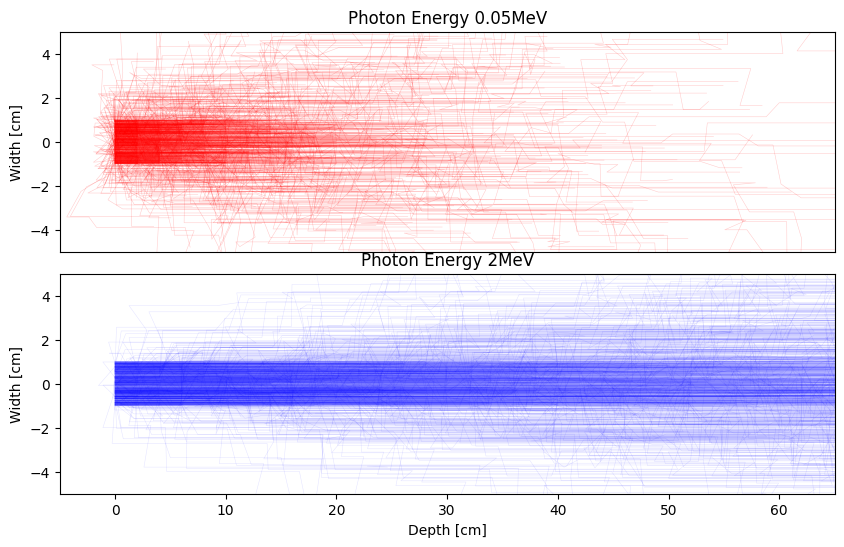

In [46]:
# Cr√©er une figure avec 2 lignes et 1 colonne
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=False)  
# Partager l'axe x entre les deux graphiques, mais pas l'axe y

# Tracer le plan z-x pour l'√©nergie photonique 1
for n in range(N):  # Boucle pour chaque photon
    axs[0].plot(z1[n], y1[n], 'r-', linewidth=0.4, alpha=0.2)  
    # Tracer z vs y pour chaque photon avec une couleur rouge et faible opacit√©

# Ajouter des √©tiquettes et un titre pour le premier sous-graphique (photon_energy_1)
axs[0].set_ylabel('Width [cm]')  # √âtiquette de l'axe y
axs[0].set_title(f'Photon Energy {photon_energy_1}MeV')  
axs[0].set_xlim([-5, 65])  # D√©finir la limite de l'axe x de -5 √† 65
axs[0].set_ylim([-5, 5])  # D√©finir la limite de l'axe y de -5 √† 5

# Tracer le plan z-x pour l'√©nergie photonique 2
for n in range(N):  # Boucle pour chaque photon
    axs[1].plot(z2[n], y2[n], 'b-', linewidth=0.4, alpha=0.1)  
    # Tracer z vs y pour chaque photon avec une couleur bleue et faible opacit√©

# Ajouter des √©tiquettes et un titre pour le second sous-graphique (photon_energy_2)
axs[1].set_xlabel('Depth [cm]')  # √âtiquette de l'axe x
axs[1].set_ylabel('Width [cm]')  # √âtiquette de l'axe y
axs[1].set_title(f'Photon Energy {photon_energy_2}MeV')  
axs[1].set_xlim([-5, 65])  # D√©finir la limite de l'axe x de -5 √† 65
axs[1].set_ylim([-5, 5])  # D√©finir la limite de l'axe y de -5 √† 5

# Supprimer les ticks de l'axe x du graphique du haut
axs[0].tick_params(axis='x', which='both', bottom=False, top=False)  
     # Retirer les marques de l'axe x du sous-graphique sup√©rieur

plt.subplots_adjust(hspace=0.1)  # Espacement horizontal entre les sous-graphes

# Afficher les graphiques
plt.show()

# Interpr√©tation Physique des Trajectoires de Photons √† Diff√©rentes √ânergies

Ces figures montrent les trajectoires de photons avec deux niveaux d'√©nergie diff√©rents : **0.05 MeV** (en rouge) et **2 MeV** (en bleu). J'ai fait ici une interpr√©tation physique des diff√©rences observ√©es entre ces trajectoires **en basant sur le module de physique des radiations de Monsieur le professeur Mesradi Mohammed**.

## Interpr√©tation Physique

1. **Photons de Faible √ânergie (0.05 MeV)** :
   - √Ä cette √©nergie, les photons subissent plus fr√©quemment des **interactions de type diffusion Compton** et **effet photo√©lectrique** lorsqu‚Äôils traversent la mati√®re.
   - Le **nombre de collisions** et la **probabilit√© d‚Äôinteraction** augmentent pour les photons de faible √©nergie, ce qui explique les trajectoires complexes et la forte dispersion. En particulier :
     - Dans le cas de l‚Äôeffet photo√©lectrique, l‚Äô√©nergie du photon est enti√®rement absorb√©e par un atome, ce qui limite la p√©n√©tration.
     - La diffusion Compton entra√Æne des changements de direction apr√®s chaque interaction, produisant une trajectoire d√©sordonn√©e et plus "diffuse".
   - Cette tendance √† se disperser et √† rebondir autour de leur trajectoire initiale est visible dans la figure sup√©rieure (trajectoires rouges), o√π les photons s‚Äô√©parpillent largement. Cela refl√®te la nature impr√©visible et la **faible p√©n√©tration** des photons de faible √©nergie.

2. **Photons de Haute √ânergie (2 MeV)** :
   - Les photons √† haute √©nergie, tels que ceux √† 2 MeV, ont une **probabilit√© plus faible d'interagir avec la mati√®re** par rapport aux photons de faible √©nergie.
   - Ils traversent plus facilement la mati√®re en raison de leur √©nergie √©lev√©e, et leur trajectoire est donc plus lin√©aire et directe.
   - Dans la figure inf√©rieure (trajectoires bleues), on observe que les photons conservent une trajectoire rectiligne sur de plus grandes distances. Cela montre leur **forte p√©n√©tration** et une diffusion beaucoup plus faible.
   - Ce comportement est coh√©rent avec la pr√©diction th√©orique : les photons de haute √©nergie sont moins d√©vi√©s, car les effets comme la diffusion Compton et l'absorption deviennent moins probables √† mesure que l'√©nergie augmente.

En r√©sum√©, les photons de faible √©nergie ont une trajectoire dispers√©e en raison des interactions fr√©quentes avec la mati√®re, tandis que les photons de haute √©nergie traversent la mati√®re de mani√®re plus directe avec moins de d√©viations.



## √âvolution des Photons de 2 MeV : Att√©nuation et Diffusion

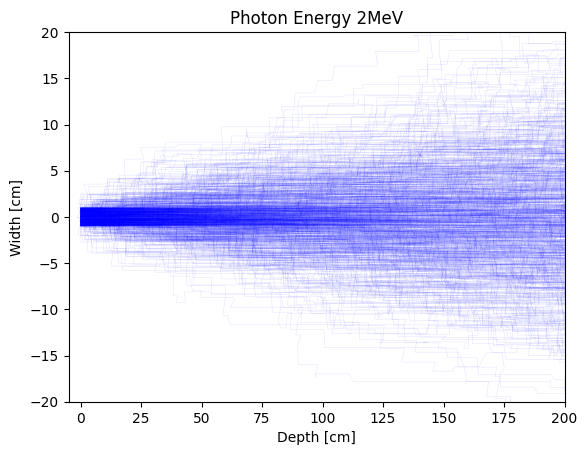

In [48]:
# Pour chaque it√©ration de N, tracer les donn√©es correspondant √† l'√©nergie photon 2
for n in range(N): # Trac√© des points z2 et y2 avec une couleur bleue, faible largeur de ligne et transparence
    plt.plot(z2[n], y2[n], 'b-', linewidth=0.4, alpha=0.1)  

# Ajouter un label √† l'axe des x
plt.xlabel('Depth [cm]')  # L'axe des x repr√©sente la profondeur en centim√®tres

# Ajouter un label √† l'axe des y
plt.ylabel('Width [cm]')  # L'axe des y repr√©sente la largeur en centim√®tres

# D√©finir les limites de l'axe des x (profondeur)
plt.xlim([-5, 200])  # Limite de -5 √† 200 pour l'axe des x

# D√©finir les limites de l'axe des y (largeur)
plt.ylim([-20, 20])  # Limite de -20 √† 20 pour l'axe des y

# Ajouter un titre au graphique
plt.title(f'Photon Energy {photon_energy_2}MeV')  # Le titre indique l'√©nergie du photon en MeV

# Afficher le graphique
plt.show()  # Afficher le graphique avec toutes les modifications


L'analyse des faisceaux de photons de 2 MeV r√©v√®le une √©volution int√©ressante. Bien qu'ils commencent avec une forte √©nergie, les photons √† haute √©nergie subissent une att√©nuation et pr√©sentent une diffusion similaire √† celle des photons de plus basse √©nergie √† des profondeurs plus importantes. Au fur et √† mesure que le faisceau traverse le milieu, les photons interagissent par diffusion Compton, perdent de l'√©nergie et subissent ainsi une diffusion plus uniforme lors des interactions suivantes.

    
## Introduction au Projet 2 : Calcul de l'Int√©grale en Quatre Dimensions (C++)

Dans ce projet, nous allons estimer une int√©grale en quatre dimensions √† l'aide de la m√©thode de Monte Carlo en C++. Cette technique est particuli√®rement utile pour les int√©grales de haute dimension, o√π les m√©thodes traditionnelles deviennent inefficaces. 

### Objectif
L'objectif est de g√©n√©rer des points al√©atoires dans un espace √† quatre dimensions, d'√©valuer une fonction donn√©e en ces points, puis de calculer la moyenne des valeurs obtenues. En multipliant cette moyenne par le volume de l'espace int√©gr√©, nous obtenons une estimation de l'int√©grale.

### M√©thode de Monte Carlo
La m√©thode de Monte Carlo consiste √† approximer l'int√©grale en utilisant un grand nombre de points al√©atoires. Plus le nombre de points est √©lev√©, plus la pr√©cision de l'estimation augmente, mais cela entra√Æne √©galement un temps de calcul plus important. 

### Outil Utilis√©
Pour ce projet, j'ai choisi de coder en C++ dans Visual Studio car cet environnement est mieux adapt√© aux calculs de haute performance et √† la gestion de la m√©moire, contrairement √† Jupyter Notebook, qui ne prend pas en charge C++ sans l'ajout de noyaux sp√©cifiques.

**Vous trouverez le code complet en C++ du projet dans mon Github**.
    

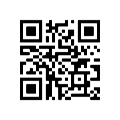

In [1]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('Zakaria_TAOUBI.png')
fig, ax = plt.subplots(figsize=(2, 2)) 
ax.imshow(img)
ax.axis('off') 
plt.subplots_adjust(left=0.5- 0.25, right=2, top=0.5 + 0.25, bottom=0.5- 0.25)
plt.show()

In [51]:
import random
import math

def F(x, y, z, w):
    # La fonction √† int√©grer est exp(x + y + z + w)
    return math.exp(x + y + z + w)

def main():
    # Initialisation des variables pour l'int√©grale et les bornes
    sum = 0.0
    x, y, z, w = 0, 0, 0, 0
    
    # Demander les bornes d'int√©gration pour chaque dimension
    a = float(input("Entrez la valeur de la 1√®re int√©grale : borne inf√©rieure\n"))
    b = float(input("Entrez la valeur de la 1√®re int√©grale : borne sup√©rieure\n"))
    c = float(input("Entrez la valeur de la 2√®me int√©grale : borne inf√©rieure\n"))
    d = float(input("Entrez la valeur de la 2√®me int√©grale : borne sup√©rieure\n"))
    e = float(input("Entrez la valeur de la 3√®me int√©grale : borne inf√©rieure\n"))
    f = float(input("Entrez la valeur de la 3√®me int√©grale : borne sup√©rieure\n"))
    g = float(input("Entrez la valeur de la 4√®me int√©grale : borne inf√©rieure\n"))
    h = float(input("Entrez la valeur de la 4√®me int√©grale : borne sup√©rieure\n"))
    
    # Demander le nombre de r√©p√©titions pour l'estimation (N)
    N = int(input("Entrez le nombre de r√©p√©titions\n"))

    # Boucle Monte Carlo pour g√©n√©rer des points al√©atoires et √©valuer l'int√©grale
    for i in range(N):
        # G√©n√©rer des valeurs al√©atoires dans les intervalles sp√©cifi√©s pour chaque variable
        x = a + (b - a) * random.random()
        y = c + (d - c) * random.random()
        z = e + (f - e) * random.random()
        w = g + (h - g) * random.random()
        
        sum += F(x, y, z, w)

    # Calcul de l'int√©grale en multipliant par le volume de l'espace int√©gr√©
    volume = (b - a) * (d - c) * (f - e) * (h - g)
    I = volume * sum / N
    
    # Affichage du r√©sultat
    print(f"Int√©grale approxim√©e : {I}")

# Appeler la fonction principale pour ex√©cuter le programme
if __name__ == "__main__":
    main()

Entrez la valeur de la 1√®re int√©grale : borne inf√©rieure
0
Entrez la valeur de la 1√®re int√©grale : borne sup√©rieure
5
Entrez la valeur de la 2√®me int√©grale : borne inf√©rieure
2
Entrez la valeur de la 2√®me int√©grale : borne sup√©rieure
4
Entrez la valeur de la 3√®me int√©grale : borne inf√©rieure
3
Entrez la valeur de la 3√®me int√©grale : borne sup√©rieure
6
Entrez la valeur de la 4√®me int√©grale : borne inf√©rieure
2
Entrez la valeur de la 4√®me int√©grale : borne sup√©rieure
6
Entrez le nombre de r√©p√©titions
15
Int√©grale approxim√©e : 3532118494.0962687


Pour am√©liorer la pr√©cision de l'estimation, il est n√©cessaire d'augmenter le nombre de r√©p√©titions de 15 fois. Cette m√©thode devient plus fiable √† mesure que l'on g√©n√®re un plus grand nombre de points al√©atoires, permettant ainsi d'obtenir une estimation plus stable et proche de la valeur r√©elle de l'int√©grale.

## Loi de Cauchy 

- 1. Densit√© de probabilit√© (PDF)

La fonction de densit√© de probabilit√© (PDF) pour une loi de Cauchy avec param√®tres \(a > 0\) (√©chelle) et \(x_0\) (centre) est donn√©e par :

$$
f(x) = \frac{1}{\pi a \left[ 1 + \left( \frac{x - x_0}{a} \right)^2 \right]}, \quad x \in \mathbb{R}.
$$

---

- 2. Fonction de r√©partition (CDF)

La fonction de r√©partition \(F(x)\) s'√©crit :

$$
F(x) = \frac{1}{\pi} \arctan\left(\frac{x - x_0}{a}\right) + \frac{1}{2}.
$$

---

- 3. Fonction inverse de la r√©partition

L'inverse de la fonction de r√©partition \(F(x)\), utilis√©e pour g√©n√©rer des variables al√©atoires suivant une loi de Cauchy √† partir d'une variable uniforme \(U(0, 1)\), est donn√©e par :

$$
x = F^{-1}(y) = x_0 + a \tan\left[\pi \left(y - \frac{1}{2}\right)\right].
$$

---

- 4. Calcul int√©gral pour la CDF

La fonction de r√©partition est obtenue en int√©grant la densit√© :

$$
F(x) = \int_{-\infty}^x f(t) \, dt = \frac{1}{\pi} \arctan\left(\frac{x - x_0}{a}\right) + \frac{1}{2}.
$$


In [1]:
import numpy as np

# Fonction qui simule une loi de Cauchy
def LoiCauchy(Y, a, x0):
    return a * np.tan(np.pi * (Y - 0.5)) + x0

# Entr√©e des param√®tres
a = float(input("Entrez le param√®tre a (√©chelle) : "))
x0 = float(input("Entrez le param√®tre x0 (position) : "))
N = int(input("Entrez le nombre de r√©p√©titions : "))

# Boucle de g√©n√©ration
for i in range(N):
    Y = np.random.rand()  # G√©n√©ration uniforme
    X = LoiCauchy(Y, a, x0)  # G√©n√©ration Cauchy
    print(X)


Entrez le param√®tre a (√©chelle) : 1
Entrez le param√®tre x0 (position) : 0
Entrez le nombre de r√©p√©titions : 10
-12.325141275090324
-7.629571014642534
-1.3731142942396586
-2.0609379734124023
7.360861292116273
-0.9314837603011623
3.24028721509971
0.1408318049300397
9.970592602400489
0.2643339493052541


Pour une analyse claire et concise, nous avons initialement g√©n√©r√© un √©chantillon de 10 valeurs (bien que 10 000 aient √©t√© g√©n√©r√©es, ce qui a donn√© 200 pages de r√©sultats), afin de limiter la complexit√© des donn√©es. Cependant, pour une meilleure visualisation de la loi de Cauchy, nous avons opt√© pour la g√©n√©ration de 10 000 valeurs, permettant ainsi de repr√©senter plus fid√®lement la distribution sous forme de graphique. Cette approche √©quilibre simplicit√© et pr√©cision dans l'analyse.

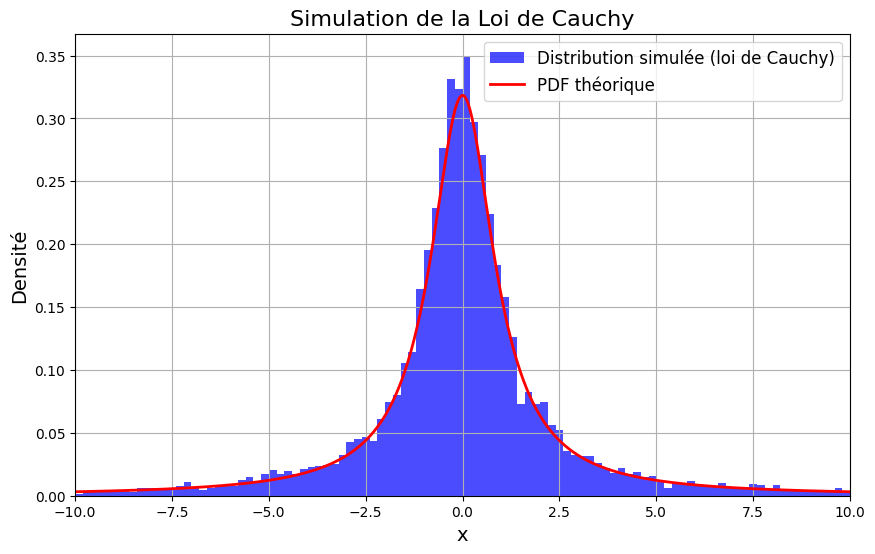

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Param√®tres de la loi de Cauchy
a = 1.0   # Param√®tre d'√©chelle (largeur)
x0 = 0.0  # Param√®tre de localisation (centre)
N = 10000  # Nombre d'√©chantillons

# G√©n√©rer des nombres al√©atoires uniformes entre 0 et 1
U = np.random.uniform(0, 1, N)

# Appliquer la formule de l'inverse de la fonction de r√©partition pour g√©n√©rer des variables al√©atoires Cauchy
X = x0 + a * np.tan(np.pi * (U - 0.5))

# Tracer l'histogramme des valeurs simul√©es
plt.figure(figsize=(10, 6))
plt.hist(X, bins=100, range=(-10, 10), density=True, color='blue', alpha=0.7, label="Distribution simul√©e (loi de Cauchy)")

# Superposer la fonction de densit√© th√©orique pour comparaison
x = np.linspace(-10, 10, 1000)
pdf = 1 / (np.pi * a * (1 + ((x - x0) / a) ** 2))
plt.plot(x, pdf, 'r', label="PDF th√©orique", linewidth=2)

plt.title("Simulation de la Loi de Cauchy", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("Densit√©", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.xlim(-10, 10)  # Fixer les limites de l'axe x pour une meilleure visualisation
plt.show()


### Commentaire

1. **Description** : Le graphique compare une simulation de la loi de Cauchy (histogramme bleu) avec sa densit√© th√©orique (courbe rouge). Les valeurs de xsont limit√©es √† [-10, 10].

2. **Analyse** :  
   - **Pic central** : Le pic √† x = 0 refl√®te la concentration de la densit√© autour de xo  
   - **Queues √©paisses** : La loi montre des valeurs extr√™mes fr√©quentes, typiques de ses "queues √©paisses".  

3. **Conclusion** : La simulation correspond bien √† la densit√© th√©orique, confirmant la validit√© des donn√©es g√©n√©r√©es.


 <div style="background-color:#e6f7ff; padding: 20px; border-radius: 8px;">

### Remerciements et Conclusion
    
Ce projet a permis d'explorer l'impact de l'√©nergie des photons sur leur comportement dans un milieu aqueux. Les r√©sultats obtenus montrent des diff√©rences significatives entre les faibles et hautes √©nergies, ce qui est crucial pour les applications en radioth√©rapie.Merci d'avoir suivi cette simulation, en esp√©rant que les analyses pr√©sent√©es vous ont apport√© des perspectives nouvelles et utiles.
    
**Zakaria Taoubi**   

√âtudiant en Master Physique M√©dicale

Institut Sup√©rieur des Sciences de la Sant√© (ISSS) - Settat
</div>
